# **Loan Delinquency Prediction: An End-to-End Machine Learning Solution**

---

In this project, a predictive model was developed to assess the likelihood of a loan becoming delinquent (90+ days overdue) within a 12-month period. The primary objective was to build the model using a training dataset (train_data.csv) and to evaluate its performance on a separate validation dataset (val_data.csv). Several key steps were undertaken, including data preparation, feature analysis, model selection, and validation. Various machine learning techniques were applied, and different models were experimented with. The performance of these models was assessed using critical evaluation metrics such as AUC-ROC, precision, recall, and F1-score. The aim was to create a reliable and generalizable model capable of accurately predicting loan delinquencies, thereby assisting financial institutions in effectively mitigating risks.

## Data Loading and Description

---



In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score,
                             recall_score, f1_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc)

from xgboost import XGBClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')
directory = "/content/drive/My Drive/Jusan_Singularity/Capstone_project"

Mounted at /content/drive


### Data Source

In [3]:
train_file = os.path.join(directory, 'train_data.csv')
train_data = pd.read_csv(train_file)
df_initial = train_data
df_initial

,Unnamed: 0,days_90_queries,flag_zpexp,ageolddate_f7,f41_my,age2,f39_my,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,...,agelifelastterm_f29,cntstartcntr_3_f75,closedel_12_f95,max_active_crd_res_amount_to_limit,active_number_of_outstanding_instalments,value_cr_card_contract,final_resincome,f8,inst_credit_cnt,target
0,0,4.0,0,26.0,NaN,25.0,12.0,NaN,6017.76,NaN,...,15.0,0.0,0.0,NaN,NaN,0.0,12.111597,0.000,NaN,0
1,1,2.0,0,101.0,NaN,31.0,NaN,0.654416,NaN,360000.0,...,26.0,0.0,0.0,0.942823,257.0,0.0,13.230096,68881.260,36.0,0
2,2,11.0,0,46.0,NaN,22.0,NaN,0.608811,NaN,73384.0,...,2.0,3.0,0.0,0.789278,17.0,0.0,11.422727,7353.900,NaN,0
3,3,4.0,0,126.0,NaN,45.0,NaN,0.761899,NaN,1081991.0,...,60.0,1.0,0.0,0.992436,64.0,0.0,13.558042,96547.400,9.0,0
4,4,4.0,0,126.0,NaN,45.0,NaN,0.761899,NaN,1081991.0,...,60.0,1.0,0.0,0.992436,64.0,0.0,13.558042,96547.400,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55707,55707,7.0,0,41.0,22.0,25.0,37.0,NaN,11162.00,NaN,...,19.0,0.0,0.0,NaN,NaN,0.0,11.920868,NaN,NaN,0
55708,55708,12.0,0,55.0,9.0,28.0,44.0,NaN,41118.00,NaN,...,17.0,0.0,0.0,NaN,NaN,4882.0,11.276203,NaN,0.0,1
55709,55709,9.0,0,95.0,33.0,32.0,NaN,NaN,NaN,NaN,...,62.0,0.0,0.0,NaN,15.0,15896.0,12.390766,12478.000,8.0,1
55710,55710,17.0,0,114.0,6.0,39.0,NaN,NaN,NaN,200000.0,...,0.0,1.0,0.0,0.000000,23.0,60390.0,12.740195,922.315,NaN,0


### EDA

In [ ]:
print(df_initial.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55712 entries, 0 to 55711
Data columns (total 38 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                55712 non-null  int64  
 1   days_90_queries                           54275 non-null  float64
 2   flag_zpexp                                55712 non-null  int64  
 3   ageolddate_f7                             55259 non-null  float64
 4   f41_my                                    23777 non-null  float64
 5   age2                                      55712 non-null  float64
 6   f39_my                                    19307 non-null  float64
 7   active_crd_amount_to_limit                36437 non-null  float64
 8   sumlastvalue_7_f50                        33036 non-null  float64
 9   avg_active_credit_limit                   38207 non-null  float64
 10  total_amount                      

In [ ]:
missing_values = df_initial.isnull().sum()
print(missing_values[missing_values > 0])

days_90_queries                              1437
ageolddate_f7                                 453
f41_my                                      31935
f39_my                                      36405
active_crd_amount_to_limit                  19275
sumlastvalue_7_f50                          22676
avg_active_credit_limit                     17505
total_amount                                 3461
amount_of_last_term_contr                    8546
avgcontractlife                              7265
sm_plus_3_months_rt                         13807
ageoldexsdate_f5                             1759
total_crd_cnt                                 452
gender                                        453
inst_crd_cnt                                11750
avg_active_amount                           12250
max_overdue_cr_card                          1402
overdue_credit_contract                      1402
total_credit_limit                           9083
max_del_history                             13527


In [ ]:
df_initial.describe()

,Unnamed: 0,days_90_queries,flag_zpexp,ageolddate_f7,f41_my,age2,f39_my,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,...,agelifelastterm_f29,cntstartcntr_3_f75,closedel_12_f95,max_active_crd_res_amount_to_limit,active_number_of_outstanding_instalments,value_cr_card_contract,final_resincome,f8,inst_credit_cnt,target
count,55712.000000,54275.000000,55712.000000,55259.000000,23777.000000,55712.000000,19307.000000,36437.000000,3.303600e+04,3.820700e+04,...,51112.000000,55260.000000,55254.000000,38207.000000,43463.000000,54310.000000,16911.000000,5.128700e+04,43092.000000,55712.000000
mean,27855.500000,12.090392,0.135824,75.889520,18.675064,34.386326,26.837054,0.721308,4.908516e+04,7.590147e+05,...,15.077125,2.835993,1.123919,0.778214,78.835768,4914.701897,12.961345,4.163461e+04,20.004897,0.187195
std,16082.813435,12.974924,0.342604,110.292805,15.371279,9.609283,18.222779,0.220594,1.671543e+05,9.094260e+05,...,26.510788,4.094233,2.214252,0.272560,85.511028,12527.493882,0.838236,5.798415e+04,19.505226,0.390071
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000006,0.000000e+00,1.000000e+00,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.166784,0.000000e+00,0.000000,0.000000
25%,13927.750000,3.000000,0.000000,46.000000,7.000000,27.000000,13.000000,0.597431,9.904000e+03,2.000000e+05,...,1.000000,0.000000,0.000000,0.667182,23.000000,0.000000,12.430451,1.745494e+04,8.000000,0.000000
50%,27855.500000,8.000000,0.000000,71.000000,14.000000,33.000000,23.000000,0.767137,2.544739e+04,5.250000e+05,...,5.000000,2.000000,0.000000,0.879608,53.000000,1.000000,13.033576,3.237733e+04,14.000000,0.000000
75%,41783.250000,17.000000,0.000000,102.000000,27.000000,40.000000,39.000000,0.896207,5.631332e+04,9.667733e+05,...,16.000000,4.000000,1.000000,0.984520,104.000000,382.000000,13.519280,5.410904e+04,26.000000,0.000000
max,55711.000000,138.000000,1.000000,24158.000000,154.000000,89.000000,145.000000,1.969946,2.045004e+07,2.122999e+07,...,667.000000,89.000000,42.000000,8.059675,1589.000000,119128.000000,19.641366,4.953765e+06,244.000000,1.000000


In [ ]:
def detect_outliers(df):
  numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

  outlier_info = {}

  for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    num_outliers = len(outliers)

    outlier_info[col] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'num_outliers': num_outliers,
        'outliers_percentage': (num_outliers / len(df)) * 100
    }

  return pd.DataFrame(outlier_info).T

outlier_summary = detect_outliers(df_initial)
print(outlier_summary)

                                           lower_bound   upper_bound  \
Unnamed: 0                               -2.785550e+04  8.356650e+04   
days_90_queries                          -1.800000e+01  3.800000e+01   
flag_zpexp                                0.000000e+00  0.000000e+00   
ageolddate_f7                            -3.800000e+01  1.860000e+02   
f41_my                                   -2.300000e+01  5.700000e+01   
age2                                      7.500000e+00  5.950000e+01   
f39_my                                   -2.600000e+01  7.800000e+01   
active_crd_amount_to_limit                1.492668e-01  1.344372e+00   
sumlastvalue_7_f50                       -5.970998e+04  1.259273e+05   
avg_active_credit_limit                  -9.501600e+05  2.116933e+06   
total_amount                             -8.147722e+06  1.620657e+07   
amount_of_last_term_contr                -6.273750e+05  1.192265e+06   
avgcontractlife                          -1.350000e+01  3.050000

In [ ]:
categorical_features = [col for col in df_initial.columns if df_initial[col].nunique() < 10 and df_initial[col].dtype in ['int64', 'float64']]
categorical_features

['flag_zpexp', 'gender', 'target']

Categorical Analysis

In [ ]:
df_initial.groupby('gender').mean()

,Unnamed: 0,days_90_queries,flag_zpexp,ageolddate_f7,f41_my,age2,f39_my,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,...,agelifelastterm_f29,cntstartcntr_3_f75,closedel_12_f95,max_active_crd_res_amount_to_limit,active_number_of_outstanding_instalments,value_cr_card_contract,final_resincome,f8,inst_credit_cnt,target
gender,,,,,,,,,,,,,,,,,,,,,
0.0,28644.354124,12.792018,0.109996,82.228553,18.823270,36.356806,26.957804,0.727729,49669.466308,763250.690885,...,15.107636,2.927660,1.245714,0.792941,80.346330,5626.628577,12.906568,40790.075772,21.573495,0.162076
1.0,27115.853002,11.388791,0.160914,69.563415,18.505545,32.480862,26.705360,0.714603,48426.275803,754637.930038,...,15.046038,2.744642,1.002458,0.762896,77.265307,4193.539696,13.019423,42483.348571,18.339330,0.213395


### Visualization

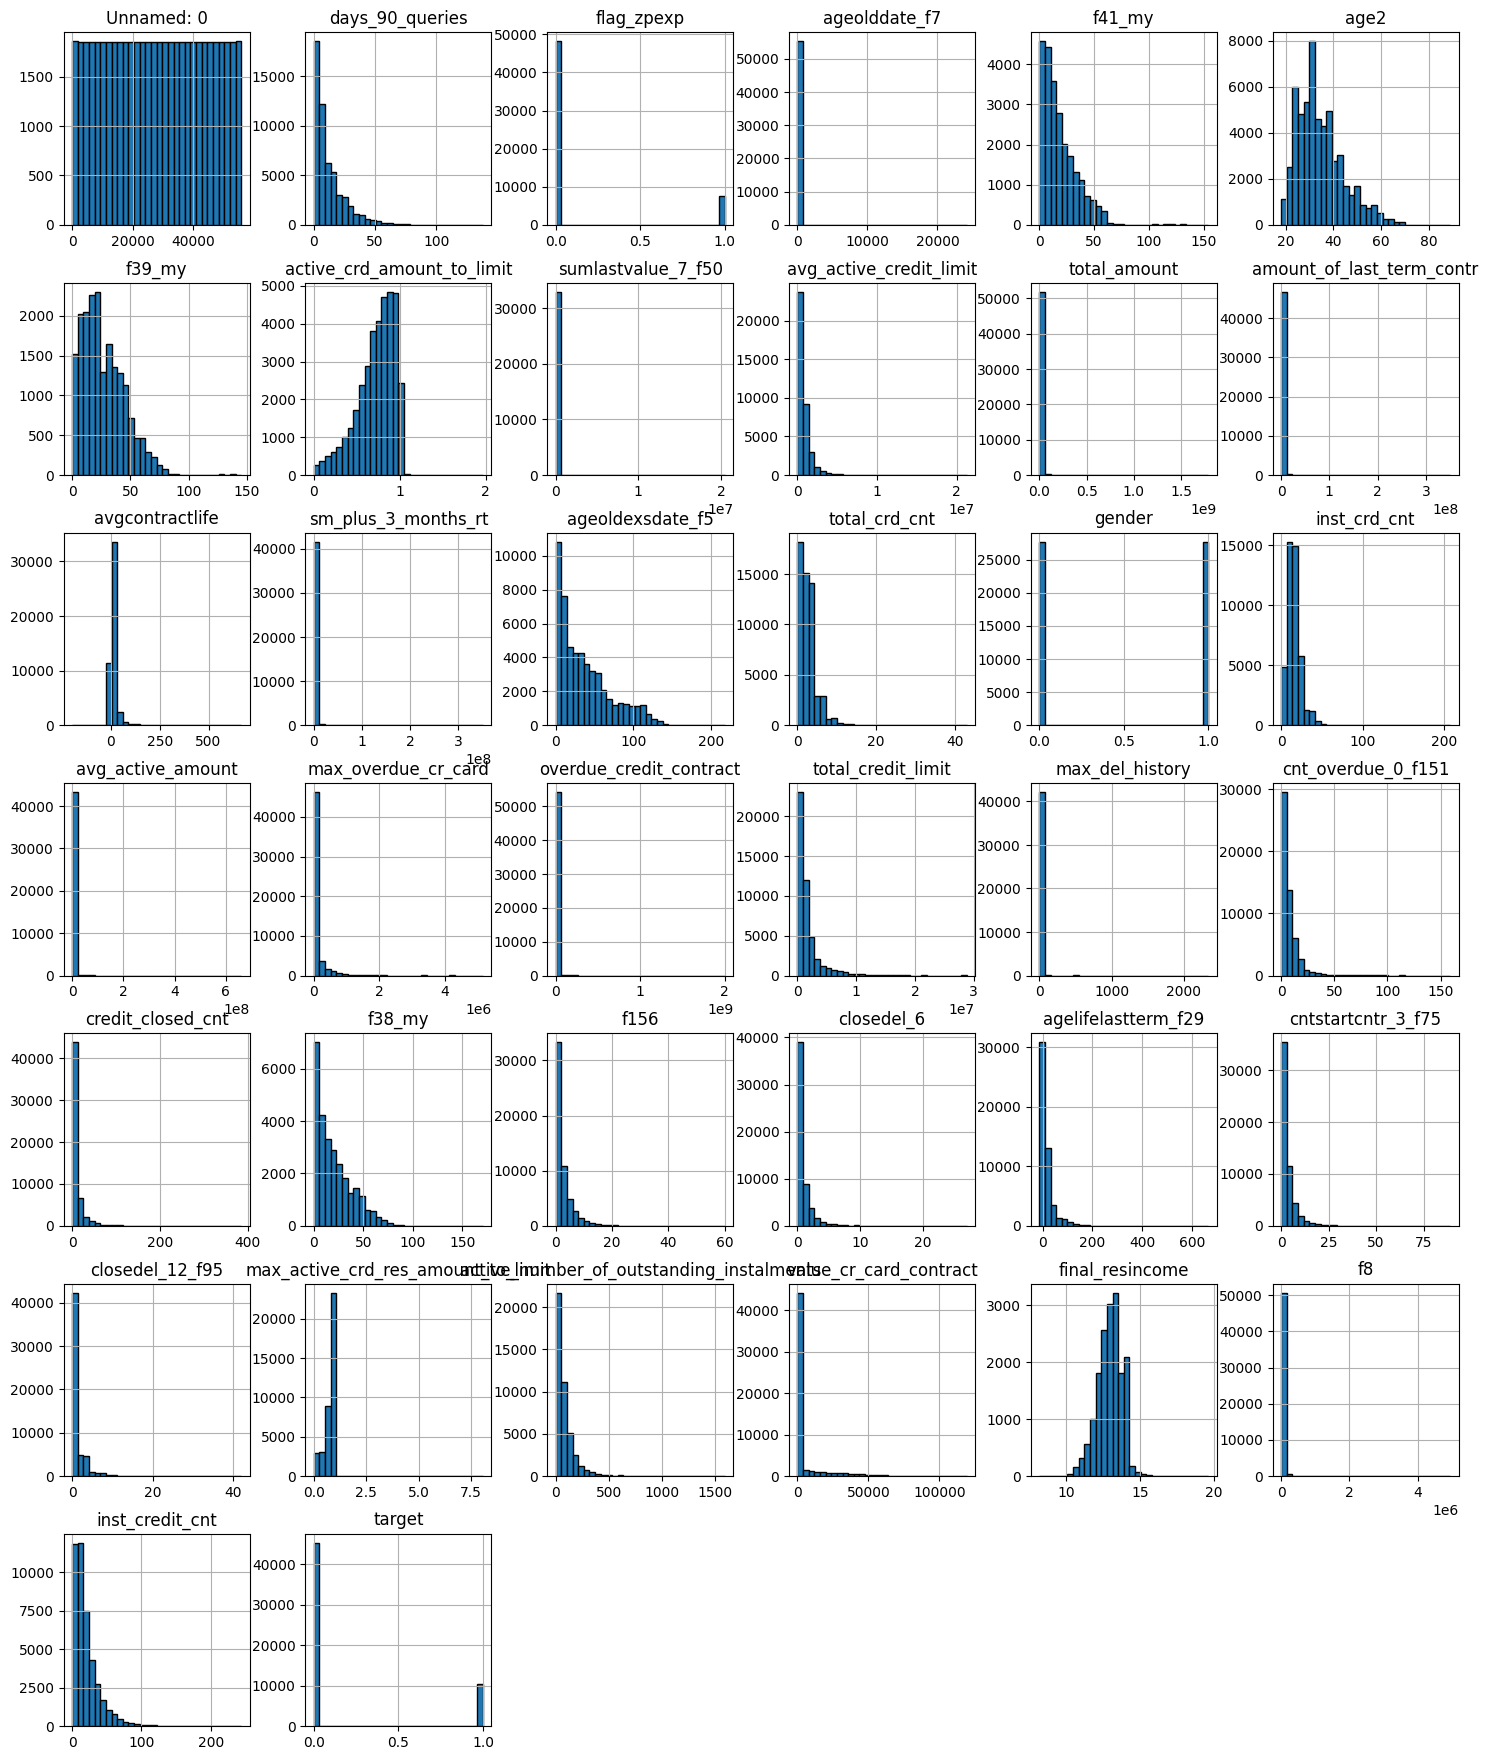

In [ ]:
numeric_features = df_initial.select_dtypes(include=['int64', 'float64']).columns
df_initial[numeric_features].hist(figsize=(18, 22), bins=30, edgecolor='k')
plt.show()

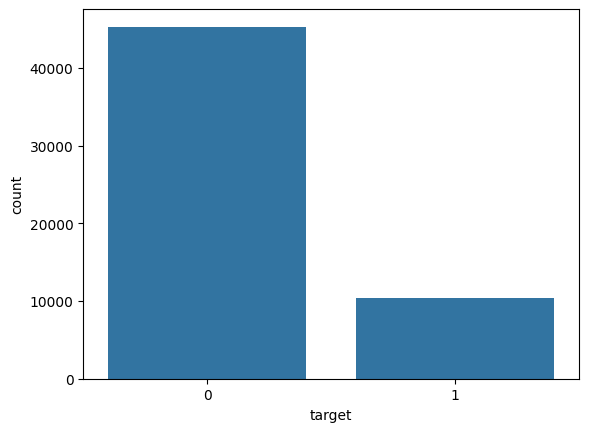

In [ ]:
sns.countplot(data=df_initial, x='target')
plt.show()

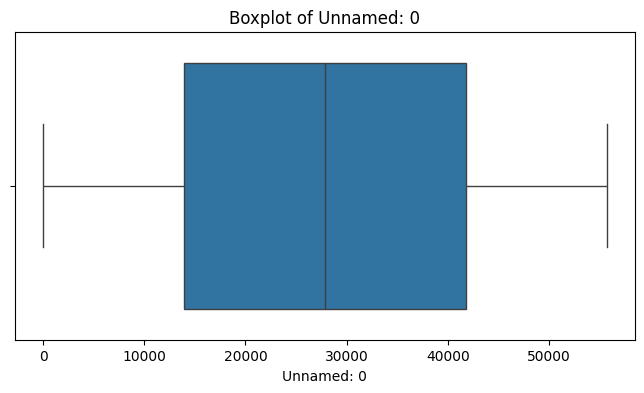

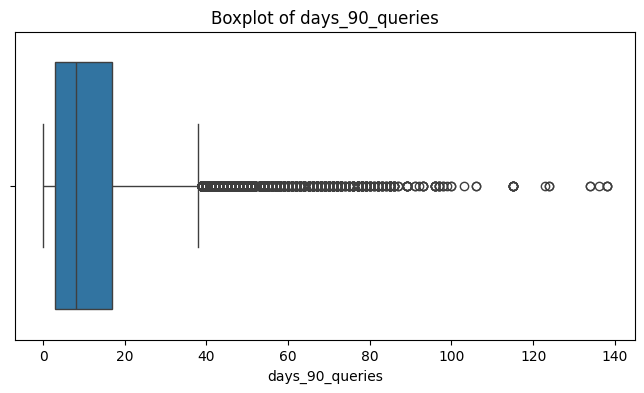

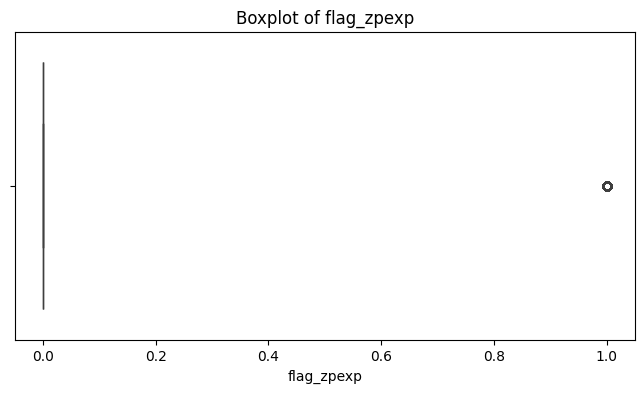

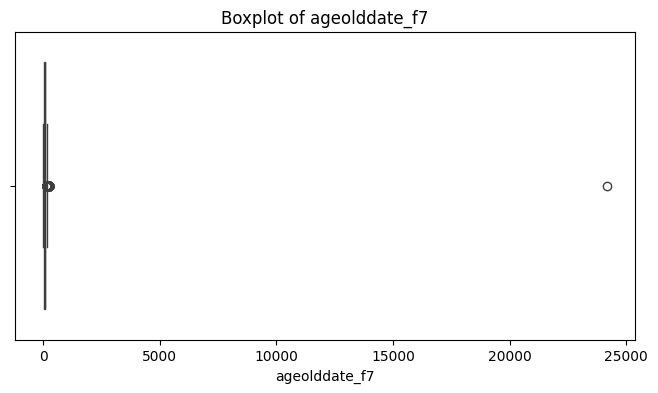

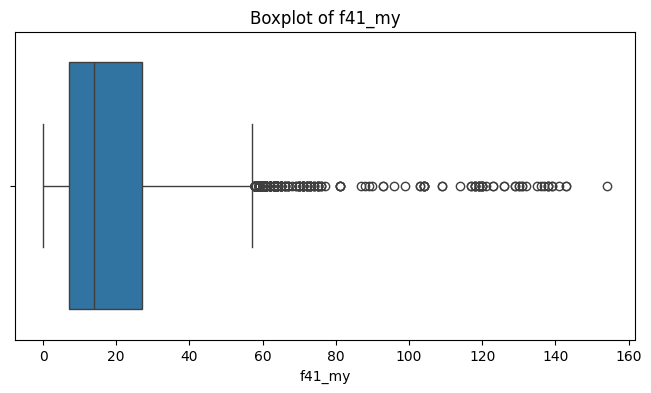

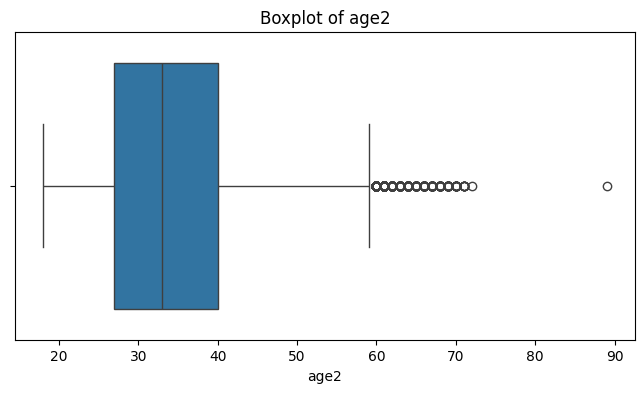

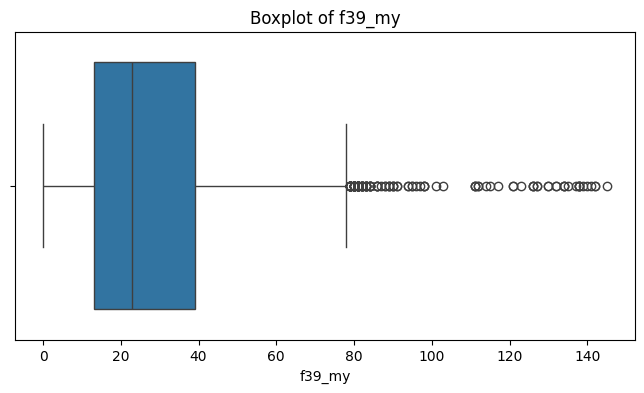

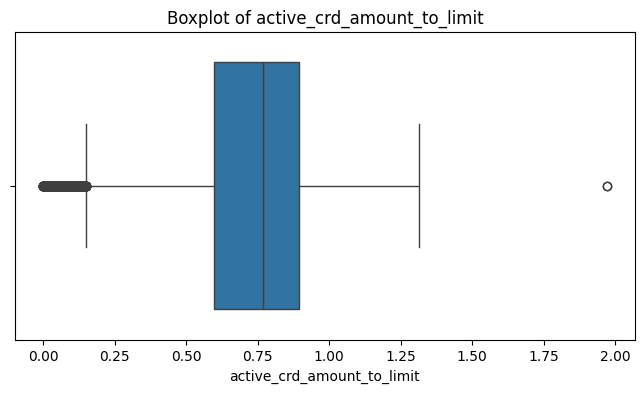

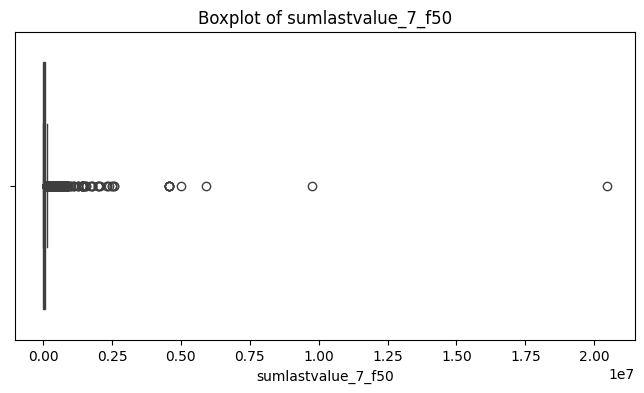

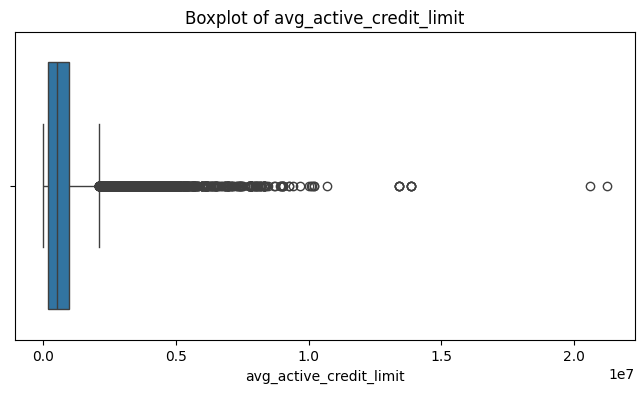

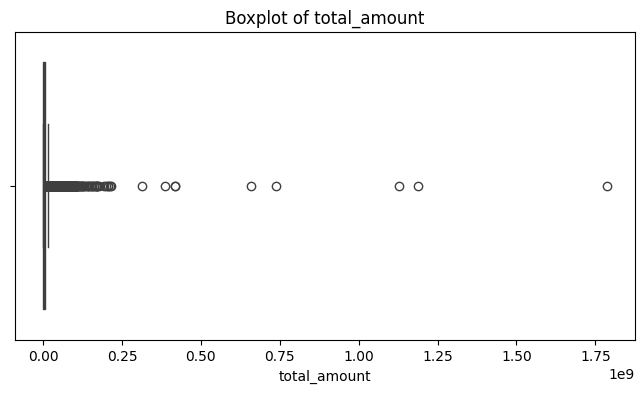

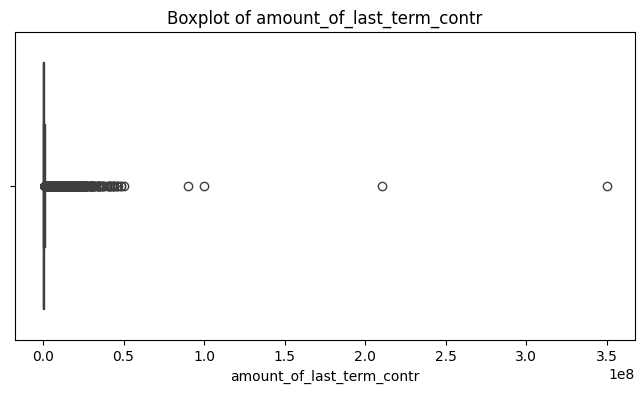

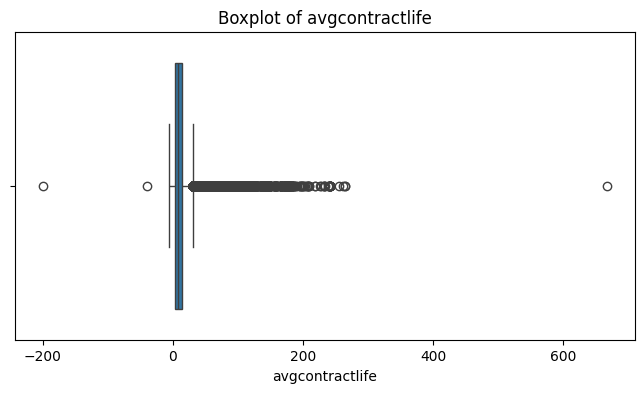

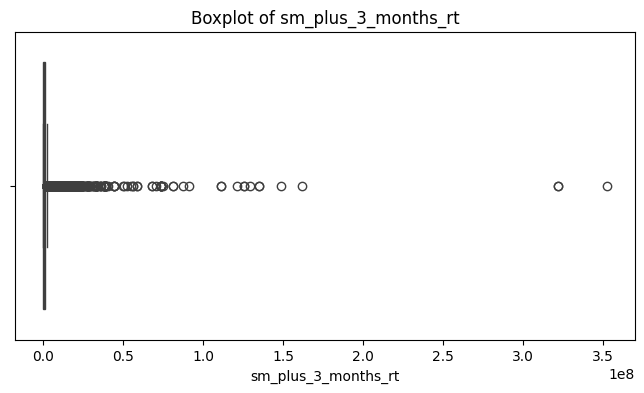

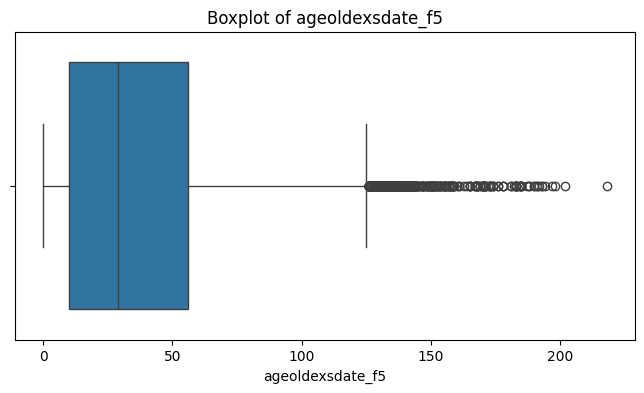

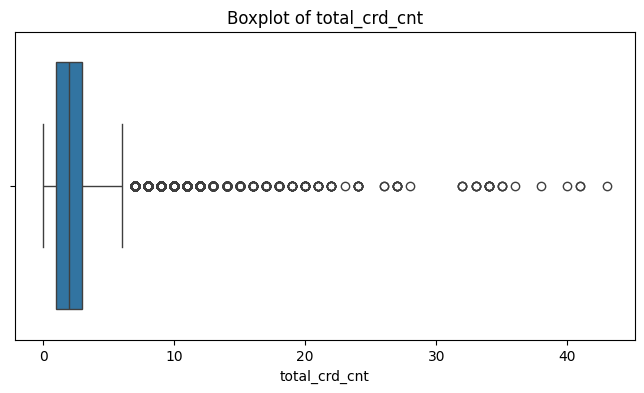

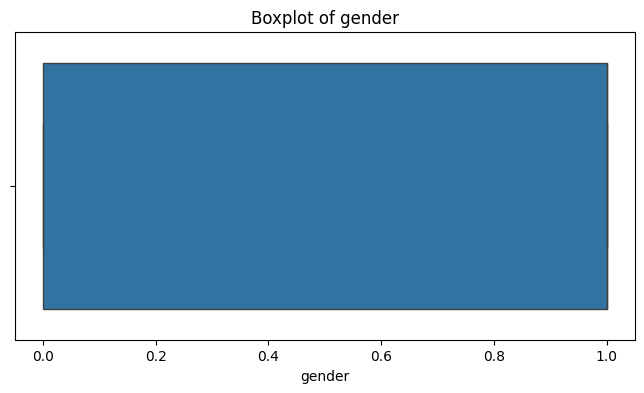

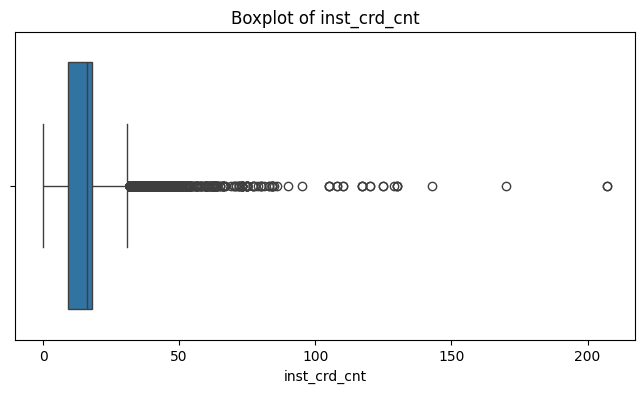

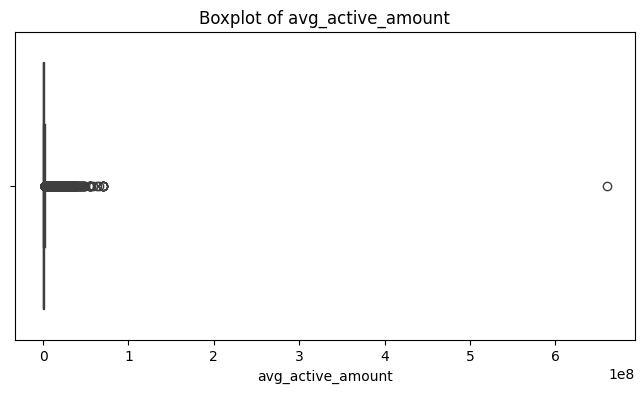

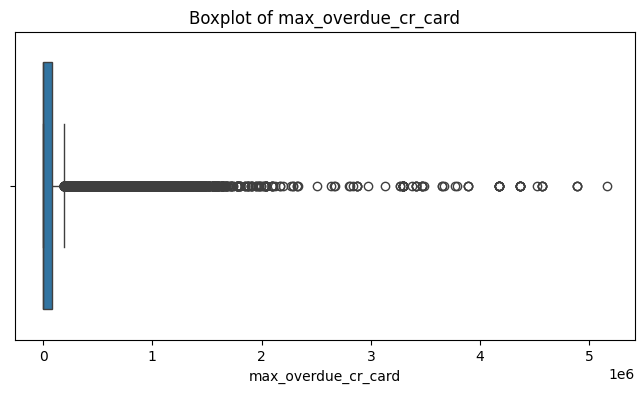

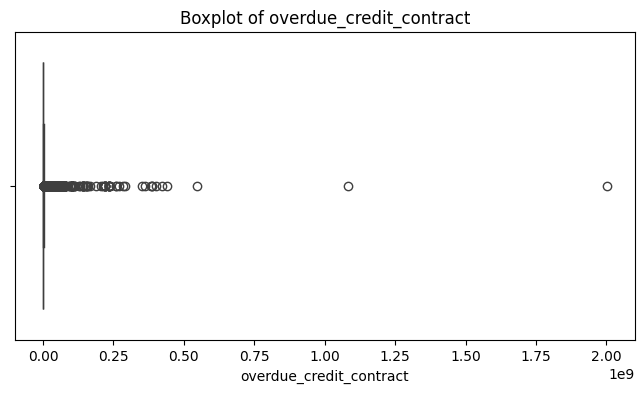

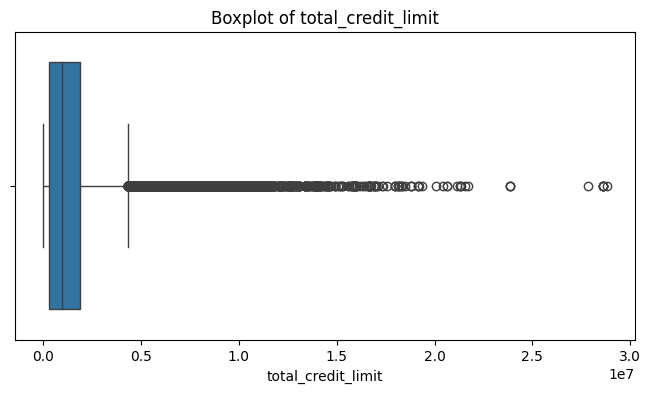

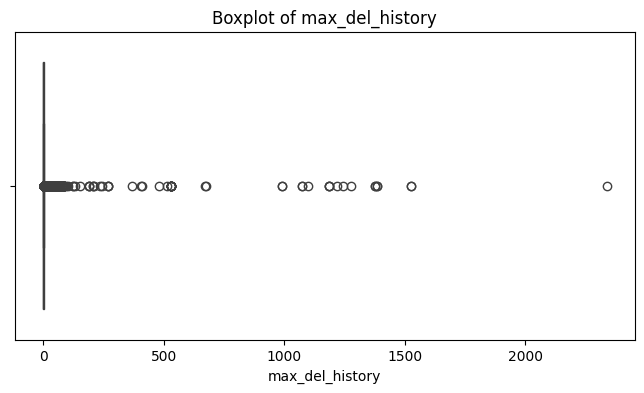

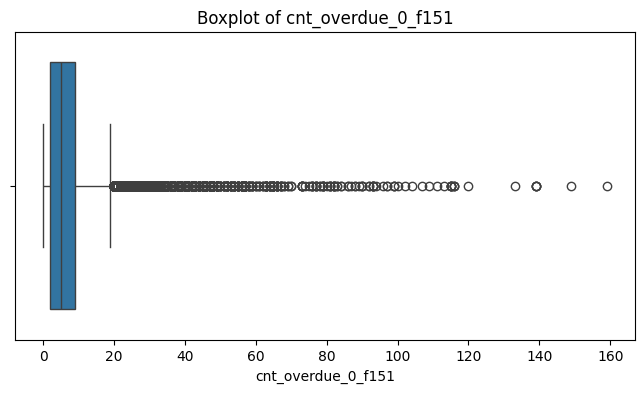

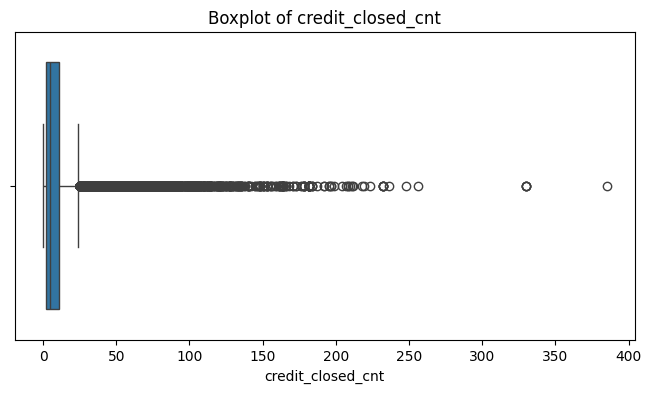

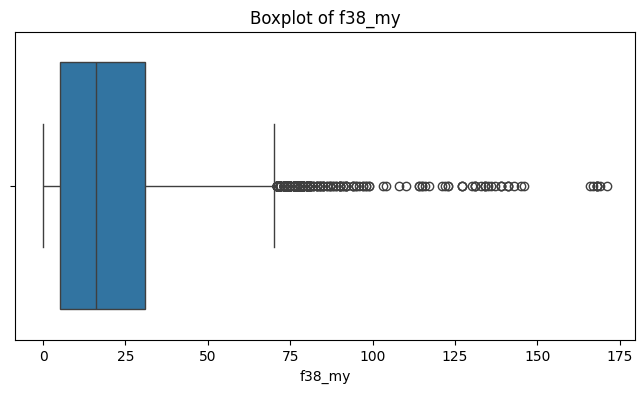

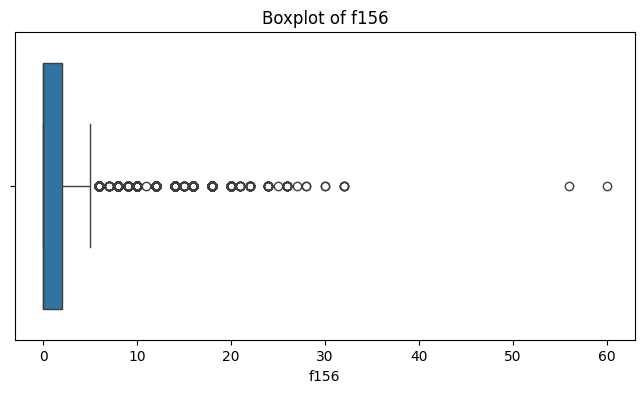

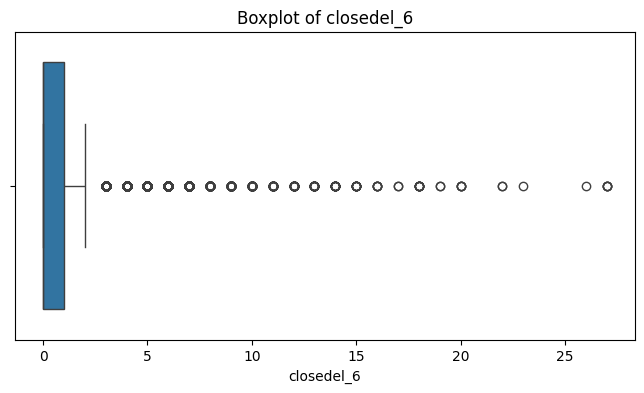

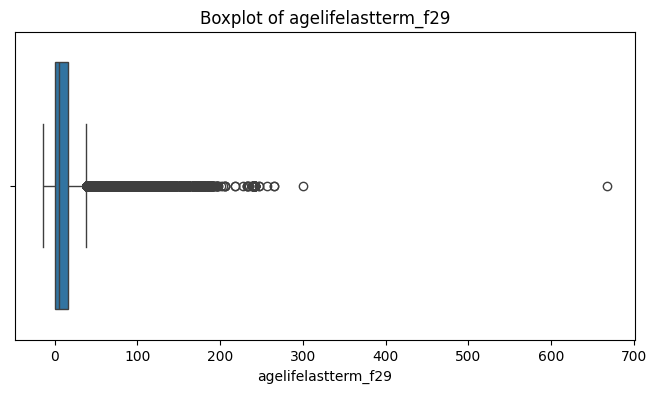

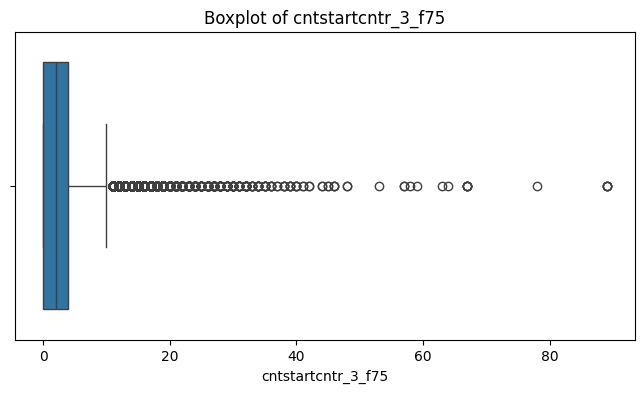

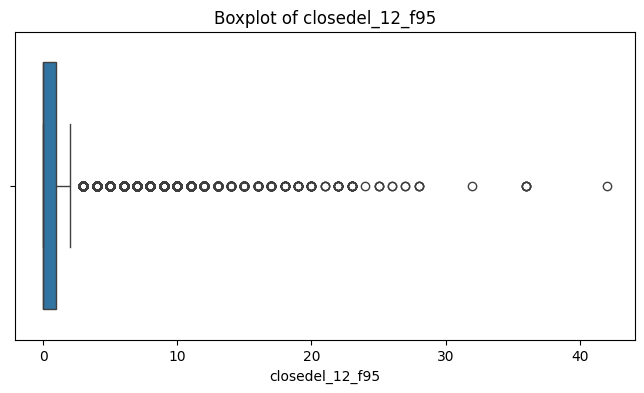

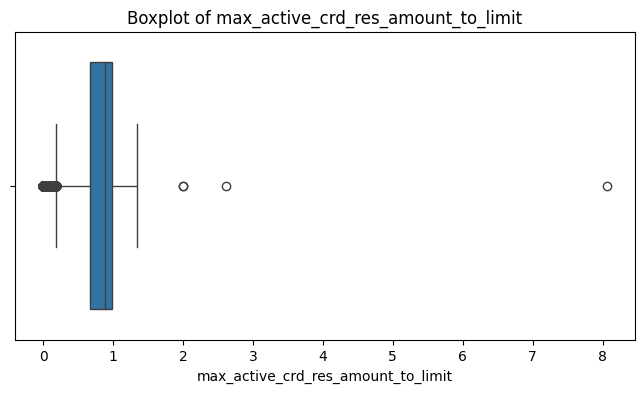

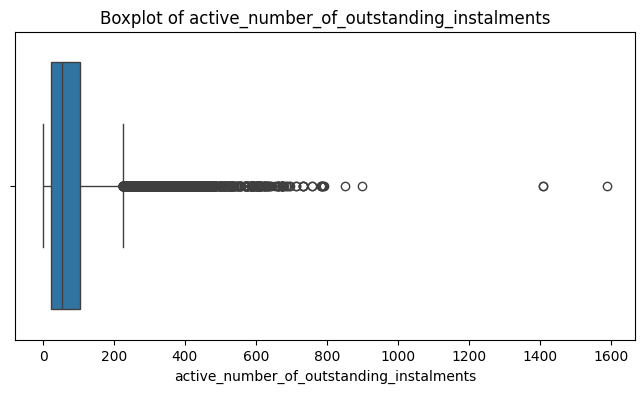

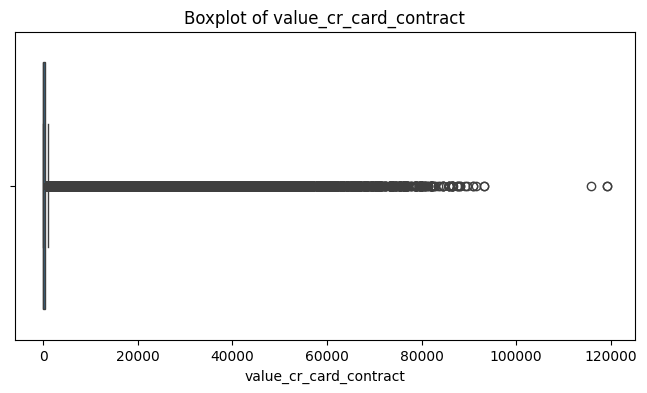

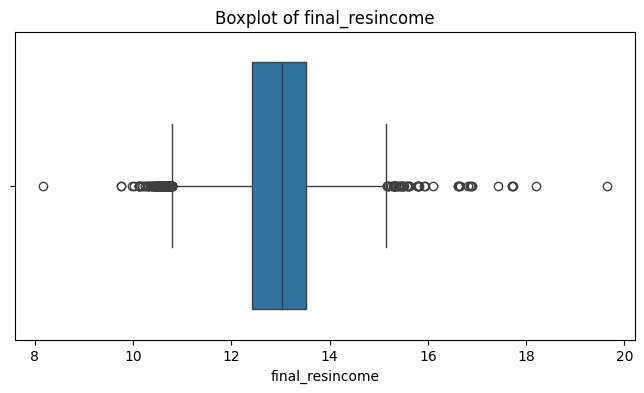

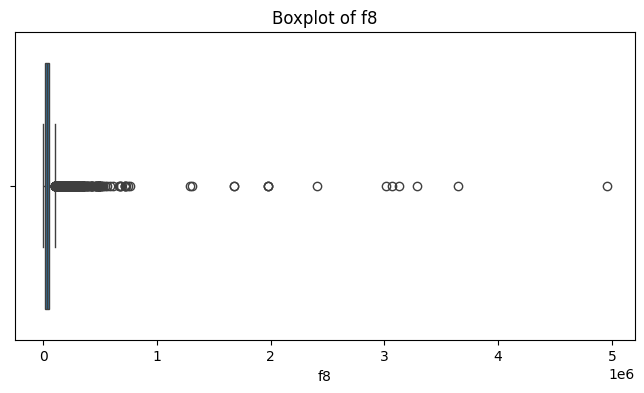

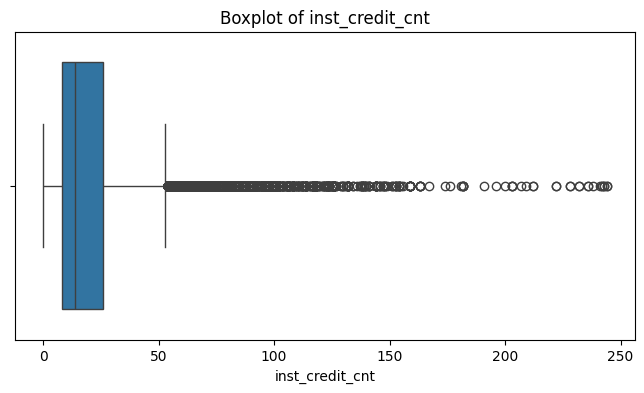

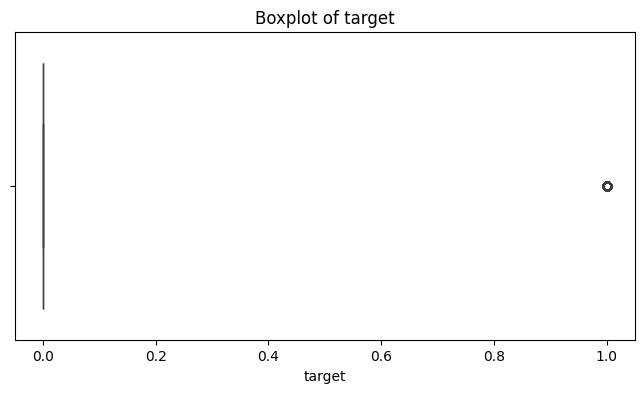

In [ ]:
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_initial, x=feature)
    plt.title(f'Boxplot of {feature}')
    plt.show()

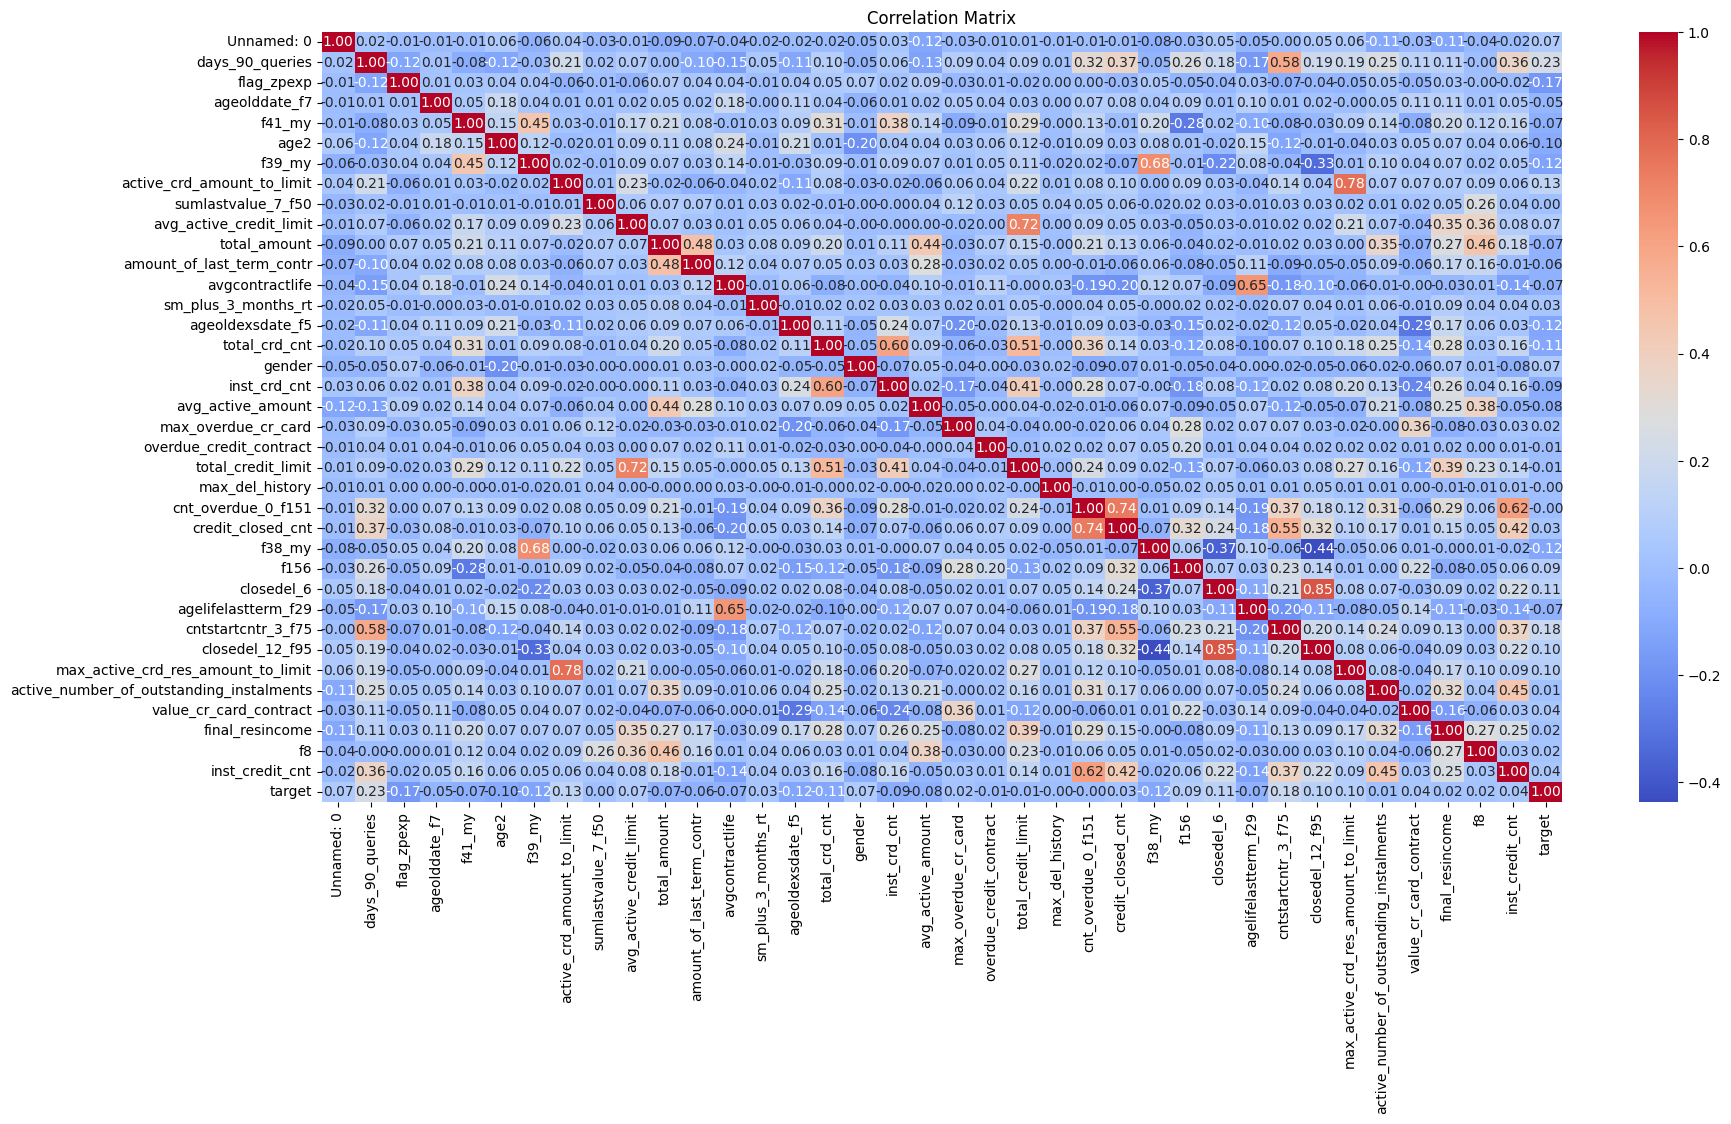

In [ ]:
corr_matrix = df_initial.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

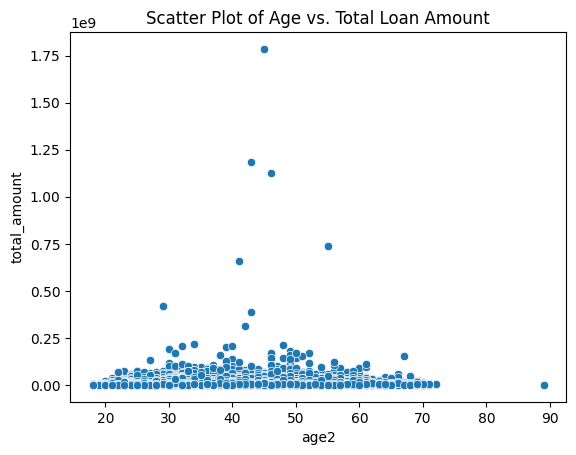

In [ ]:
sns.scatterplot(data=df_initial, x='age2', y='total_amount')
plt.title("Scatter Plot of Age vs. Total Loan Amount")
plt.show()

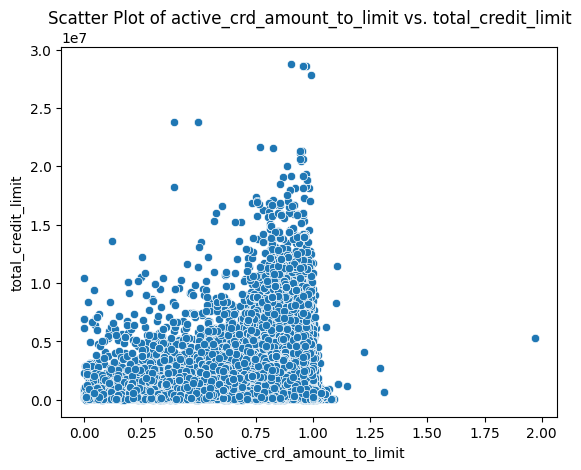

In [ ]:
sns.scatterplot(data=df_initial, x='active_crd_amount_to_limit', y='total_credit_limit')
plt.title("Scatter Plot of active_crd_amount_to_limit vs. total_credit_limit")
plt.show()

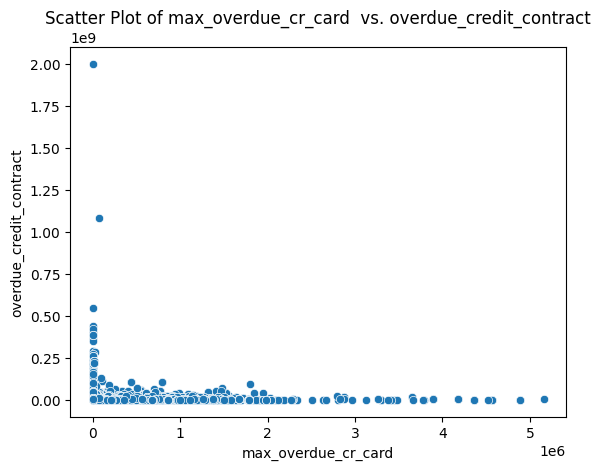

In [ ]:
sns.scatterplot(data=df_initial, x='max_overdue_cr_card', y='overdue_credit_contract')
plt.title("Scatter Plot of max_overdue_cr_card  vs. overdue_credit_contract")
plt.show()

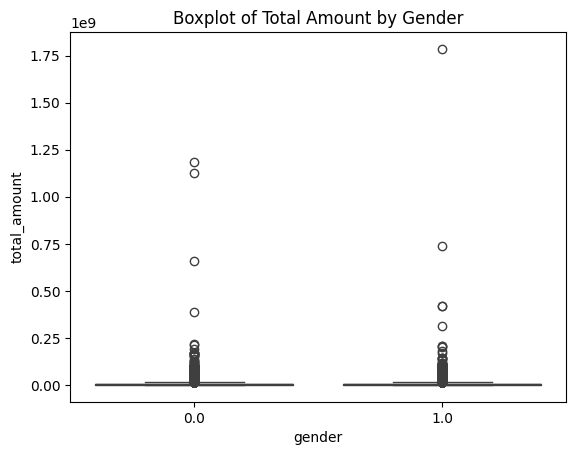

In [ ]:
sns.boxplot(data=df_initial, x='gender', y='total_amount')
plt.title("Boxplot of Total Amount by Gender")
plt.show()

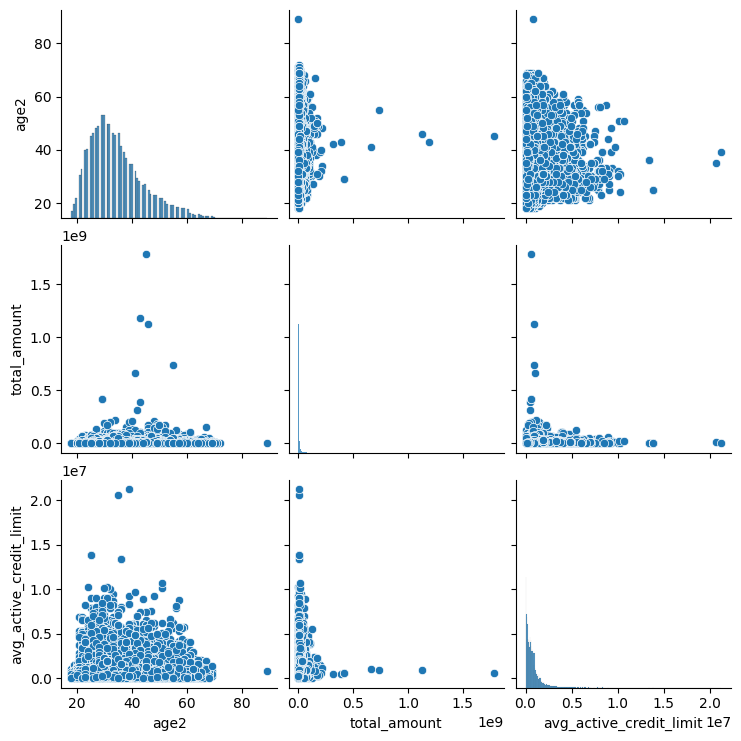

In [ ]:
sns.pairplot(df_initial, vars=['age2', 'total_amount', 'avg_active_credit_limit'])
plt.show()

## Data Preprocessing

---



### Data cleaning

In [4]:
threshold = len(df_initial) * 0.5
df = df_initial.dropna(axis=1, thresh=threshold)

In [13]:
def preprocess_data(df):
 df_cleaned = df.drop(columns=['Unnamed: 0'])

 for col in df_cleaned.columns:
  if df_cleaned[col].isnull().sum() > 0:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

 return df_cleaned

In [14]:
df_cleaned = preprocess_data(df)

<ipython-input-13-d9728b7fec7c>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55712 entries, 0 to 55711
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   days_90_queries                           55712 non-null  float64
 1   flag_zpexp                                55712 non-null  int64  
 2   ageolddate_f7                             55712 non-null  float64
 3   age2                                      55712 non-null  float64
 4   active_crd_amount_to_limit                55712 non-null  float64
 5   sumlastvalue_7_f50                        55712 non-null  float64
 6   avg_active_credit_limit                   55712 non-null  float64
 7   total_amount                              55712 non-null  float64
 8   amount_of_last_term_contr                 55712 non-null  float64
 9   avgcontractlife                           55712 non-null  float64
 10  sm_plus_3_months_rt               

### Feature Engineering

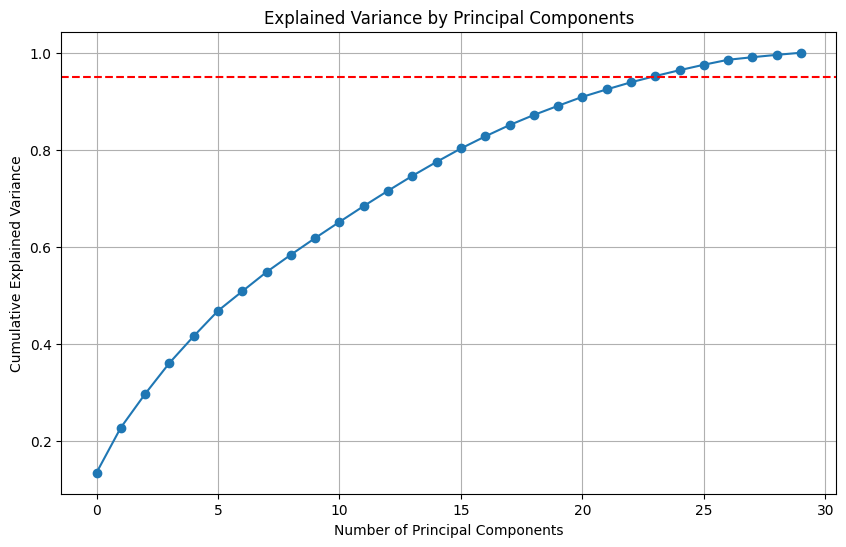

      days_90_queries  ageolddate_f7      age2  active_crd_amount_to_limit  \
PC1          0.285622       0.038430  0.010051                    0.101561   
PC2         -0.227919       0.028014  0.139939                   -0.063913   
PC3          0.024045       0.241129  0.249576                    0.092950   
PC4          0.061511      -0.027920 -0.043755                    0.494179   
PC5         -0.094204       0.228934  0.281704                   -0.065142   
PC6         -0.082106      -0.151890 -0.137685                    0.062535   
PC7         -0.078119       0.124969  0.218886                   -0.264341   
PC8         -0.032083      -0.026059 -0.125913                   -0.244871   
PC9          0.053568      -0.206931 -0.249687                   -0.123073   
PC10         0.169839      -0.169002 -0.140216                   -0.202668   
PC11         0.036518       0.023935 -0.015064                   -0.002194   
PC12        -0.016934       0.134428  0.079961                  

In [ ]:
numeric_features = df_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['gender', 'flag_zpexp', 'target'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

pca = PCA()
pca.fit(scaled_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

n_components = 10
n_components = np.argmax(cumulative_variance >= 0.95) + 1

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

feature_importance = pd.DataFrame(pca.components_, columns=numeric_features.columns, index=[f'PC{i+1}' for i in range(n_components)])

print(feature_importance)

top_features = feature_importance.abs().sum(axis=0).nlargest(n_components)  # Top 10 features
print(f"Top {n_components} Most Important Features:\n", top_features)


In [15]:
top_features = ['age2', 'active_number_of_outstanding_instalments', 'inst_crd_cnt', 'avg_active_amount',
                'sumlastvalue_7_f50', 'ageoldexsdate_f5', 'ageolddate_f7', 'max_overdue_cr_card',
                'overdue_credit_contract', 'value_cr_card_contract', 'days_90_queries', 'f156', 'f8',
                'agelifelastterm_f29', 'total_crd_cnt', 'inst_credit_cnt', 'active_crd_amount_to_limit',
                'amount_of_last_term_contr', 'avgcontractlife', 'cntstartcntr_3_f75',
                'max_active_crd_res_amount_to_limit', 'sm_plus_3_months_rt', 'avg_active_credit_limit',
                'credit_closed_cnt']

reduced_data = df_cleaned[top_features]

In [ ]:
reduced_data

,age2,active_number_of_outstanding_instalments,inst_crd_cnt,avg_active_amount,sumlastvalue_7_f50,ageoldexsdate_f5,ageolddate_f7,max_overdue_cr_card,overdue_credit_contract,value_cr_card_contract,...,total_crd_cnt,inst_credit_cnt,active_crd_amount_to_limit,amount_of_last_term_contr,avgcontractlife,cntstartcntr_3_f75,max_active_crd_res_amount_to_limit,sm_plus_3_months_rt,avg_active_credit_limit,credit_closed_cnt
0,25.0,53.0,8.0,3.807397e+05,6017.76,19.0,26.0,0.00,40270.45,0.0,...,1.0,14.0,0.767137,86589.25,15.000000,0.0,0.879608,515535.00,525000.0,2.0
1,31.0,257.0,19.0,1.114239e+07,25447.39,27.0,101.0,0.00,144976.79,0.0,...,4.0,36.0,0.654416,4682000.00,9.375000,0.0,0.942823,1007171.07,360000.0,8.0
2,22.0,17.0,18.0,1.700000e+05,25447.39,32.0,46.0,0.00,19065.00,0.0,...,11.0,14.0,0.608811,98290.00,1.666667,3.0,0.789278,24400.00,73384.0,6.0
3,45.0,64.0,18.0,7.960000e+06,25447.39,53.0,126.0,0.00,0.00,0.0,...,4.0,9.0,0.761899,2000000.00,60.000000,1.0,0.992436,9629760.00,1081991.0,1.0
4,45.0,64.0,18.0,7.960000e+06,25447.39,53.0,126.0,0.00,0.00,0.0,...,4.0,9.0,0.761899,2000000.00,60.000000,1.0,0.992436,9629760.00,1081991.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55707,25.0,53.0,16.0,3.807397e+05,11162.00,29.0,41.0,0.00,373679.84,0.0,...,0.0,14.0,0.767137,115880.00,19.000000,0.0,0.879608,14000.00,525000.0,1.0
55708,28.0,53.0,16.0,3.807397e+05,41118.00,29.0,55.0,205950.56,782512.50,4882.0,...,1.0,0.0,0.767137,35000.00,17.000000,0.0,0.879608,515535.00,525000.0,1.0
55709,32.0,15.0,16.0,2.245900e+05,25447.39,4.0,95.0,74512.22,12356214.00,15896.0,...,1.0,8.0,0.767137,700000.00,62.000000,0.0,0.879608,515535.00,525000.0,1.0
55710,39.0,23.0,3.0,4.427100e+04,25447.39,2.0,114.0,358808.57,0.00,60390.0,...,2.0,14.0,0.767137,341190.00,0.000000,1.0,0.000000,48471.00,200000.0,1.0


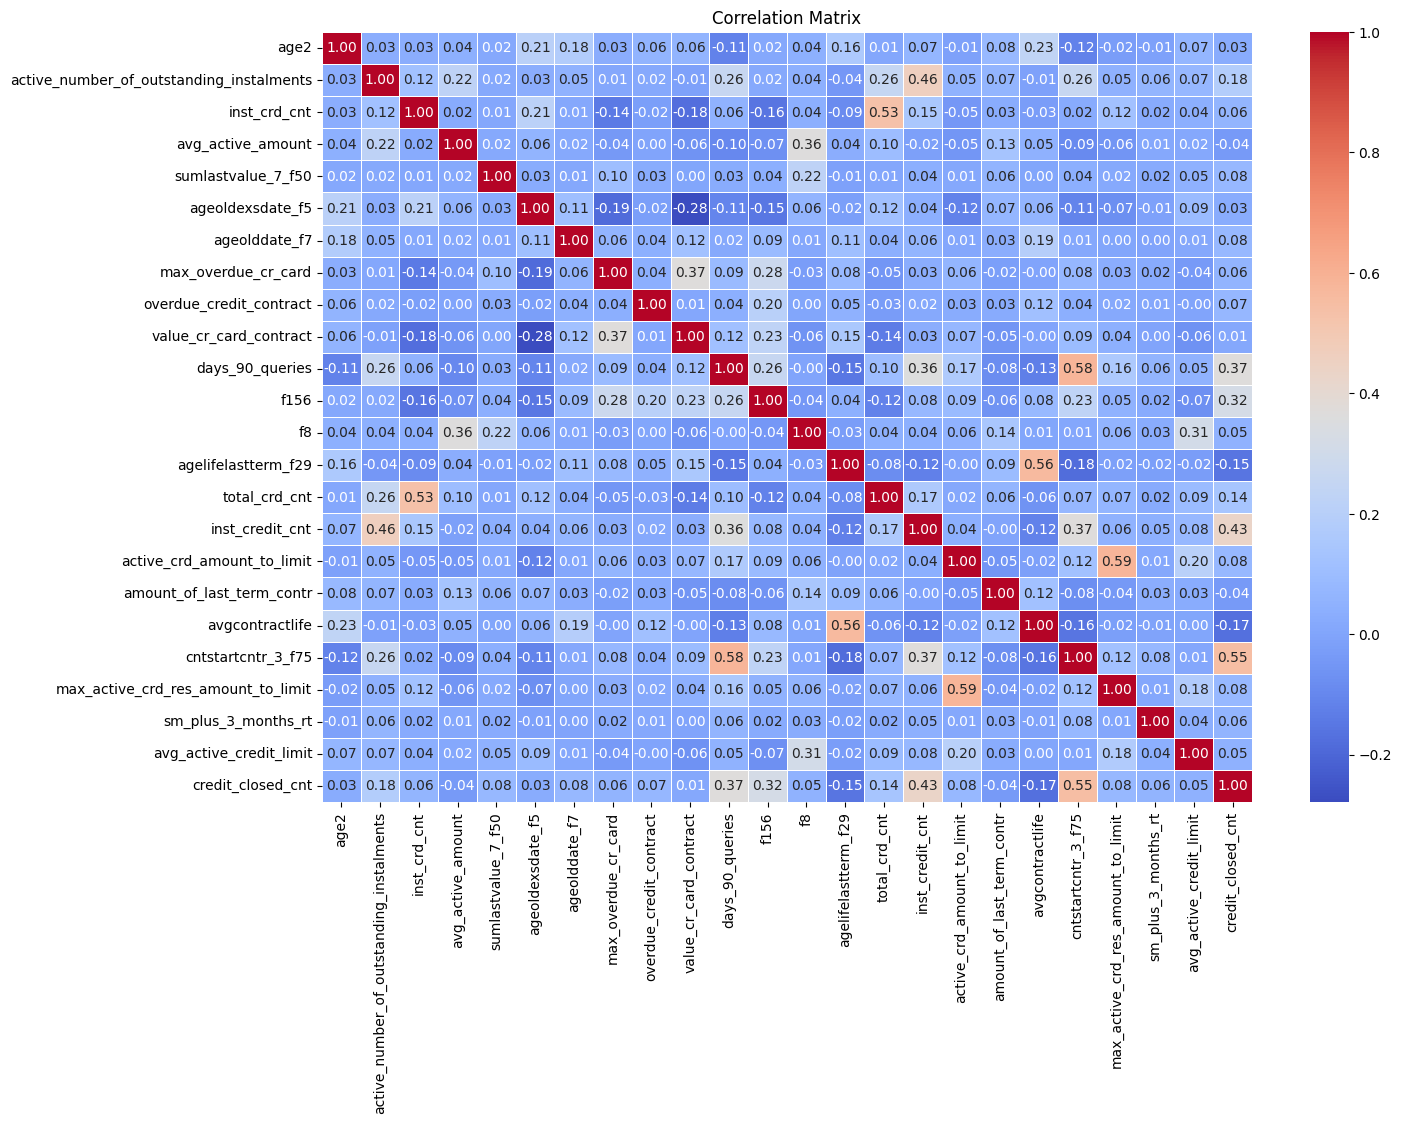

In [ ]:
corr_matrix = reduced_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
X = reduced_data.assign(Intercept=1)
vif_data = pd.DataFrame()
vif_data['Feature'] = reduced_data.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1] - 1)]

print(vif_data)

                                     Feature       VIF
0                                       age2  1.180087
1   active_number_of_outstanding_instalments  1.489211
2                               inst_crd_cnt  1.551167
3                          avg_active_amount  1.310693
4                         sumlastvalue_7_f50  1.078045
5                           ageoldexsdate_f5  1.243075
6                              ageolddate_f7  1.100123
7                        max_overdue_cr_card  1.247046
8                    overdue_credit_contract  1.059971
9                     value_cr_card_contract  1.338048
10                           days_90_queries  1.698160
11                                      f156  1.400557
12                                        f8  1.390532
13                       agelifelastterm_f29  1.566908
14                             total_crd_cnt  1.536426
15                           inst_credit_cnt  1.627149
16                active_crd_amount_to_limit  1.609624
17        

No Critical Multicollinearity: Since all features have VIFs below 2, this suggests that no single feature has a high degree of multicollinearity with others.

In [16]:
df = df_cleaned[top_features + ['flag_zpexp', 'target']]
df

,age2,active_number_of_outstanding_instalments,inst_crd_cnt,avg_active_amount,sumlastvalue_7_f50,ageoldexsdate_f5,ageolddate_f7,max_overdue_cr_card,overdue_credit_contract,value_cr_card_contract,...,active_crd_amount_to_limit,amount_of_last_term_contr,avgcontractlife,cntstartcntr_3_f75,max_active_crd_res_amount_to_limit,sm_plus_3_months_rt,avg_active_credit_limit,credit_closed_cnt,flag_zpexp,target
0,25.0,53.0,8.0,3.807397e+05,6017.76,19.0,26.0,0.00,40270.45,0.0,...,0.767137,86589.25,15.000000,0.0,0.879608,515535.00,525000.0,2.0,0,0
1,31.0,257.0,19.0,1.114239e+07,25447.39,27.0,101.0,0.00,144976.79,0.0,...,0.654416,4682000.00,9.375000,0.0,0.942823,1007171.07,360000.0,8.0,0,0
2,22.0,17.0,18.0,1.700000e+05,25447.39,32.0,46.0,0.00,19065.00,0.0,...,0.608811,98290.00,1.666667,3.0,0.789278,24400.00,73384.0,6.0,0,0
3,45.0,64.0,18.0,7.960000e+06,25447.39,53.0,126.0,0.00,0.00,0.0,...,0.761899,2000000.00,60.000000,1.0,0.992436,9629760.00,1081991.0,1.0,0,0
4,45.0,64.0,18.0,7.960000e+06,25447.39,53.0,126.0,0.00,0.00,0.0,...,0.761899,2000000.00,60.000000,1.0,0.992436,9629760.00,1081991.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55707,25.0,53.0,16.0,3.807397e+05,11162.00,29.0,41.0,0.00,373679.84,0.0,...,0.767137,115880.00,19.000000,0.0,0.879608,14000.00,525000.0,1.0,0,0
55708,28.0,53.0,16.0,3.807397e+05,41118.00,29.0,55.0,205950.56,782512.50,4882.0,...,0.767137,35000.00,17.000000,0.0,0.879608,515535.00,525000.0,1.0,0,1
55709,32.0,15.0,16.0,2.245900e+05,25447.39,4.0,95.0,74512.22,12356214.00,15896.0,...,0.767137,700000.00,62.000000,0.0,0.879608,515535.00,525000.0,1.0,0,1
55710,39.0,23.0,3.0,4.427100e+04,25447.39,2.0,114.0,358808.57,0.00,60390.0,...,0.767137,341190.00,0.000000,1.0,0.000000,48471.00,200000.0,1.0,0,0


In [ ]:
df.columns

Index(['age2', 'active_number_of_outstanding_instalments', 'inst_crd_cnt',
       'avg_active_amount', 'sumlastvalue_7_f50', 'ageoldexsdate_f5',
       'ageolddate_f7', 'max_overdue_cr_card', 'overdue_credit_contract',
       'value_cr_card_contract', 'days_90_queries', 'f156', 'f8',
       'agelifelastterm_f29', 'total_crd_cnt', 'inst_credit_cnt',
       'active_crd_amount_to_limit', 'amount_of_last_term_contr',
       'avgcontractlife', 'cntstartcntr_3_f75',
       'max_active_crd_res_amount_to_limit', 'sm_plus_3_months_rt',
       'avg_active_credit_limit', 'credit_closed_cnt', 'flag_zpexp', 'target'],
      dtype='object')

## Model building

### Model selection & training

In [17]:
X = df.drop('target', axis=1)
y = df['target']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LogisticRegression AUC: 0.7615924951730407
LogisticRegression Accuracy: 0.8159382572018308
LogisticRegression Precision: 0.5969773299748111
LogisticRegression Recall: 0.11137218045112782
LogisticRegression F1 Score: 0.18772277227722772
              precision    recall  f1-score   support

           0       0.82      0.98      0.90      9015
           1       0.60      0.11      0.19      2128

    accuracy                           0.82     11143
   macro avg       0.71      0.55      0.54     11143
weighted avg       0.78      0.82      0.76     11143



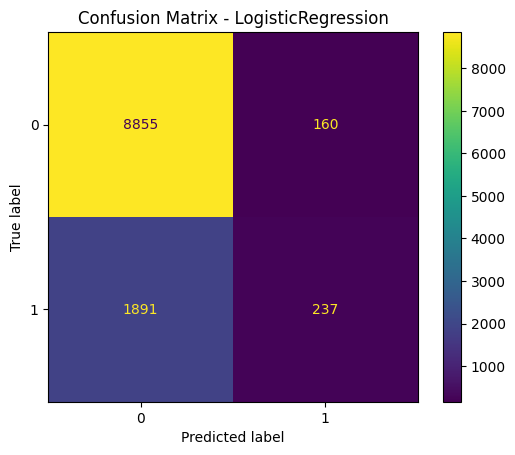

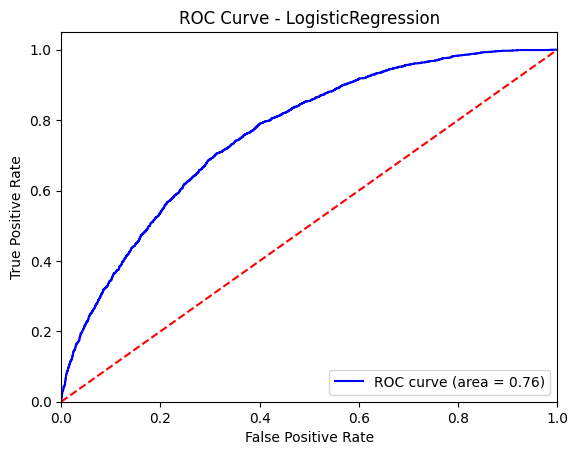

DecisionTreeClassifier AUC: 0.751592609852418
DecisionTreeClassifier Accuracy: 0.8376559274881091
DecisionTreeClassifier Precision: 0.5706690296854231
DecisionTreeClassifier Recall: 0.6052631578947368
DecisionTreeClassifier F1 Score: 0.5874572405929305
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      9015
           1       0.57      0.61      0.59      2128

    accuracy                           0.84     11143
   macro avg       0.74      0.75      0.74     11143
weighted avg       0.84      0.84      0.84     11143



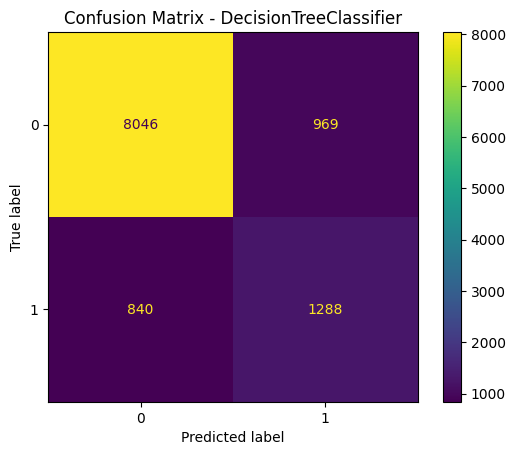

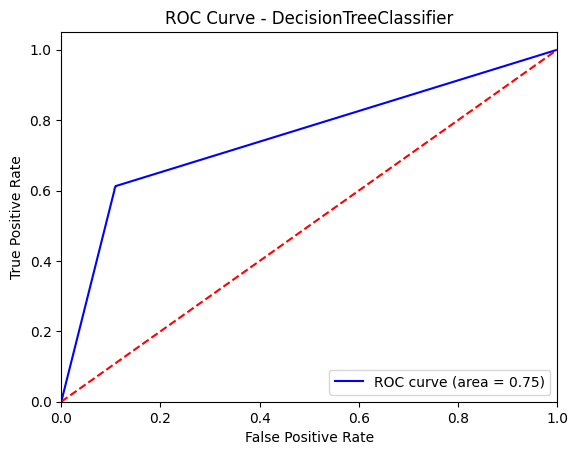

RandomForestClassifier AUC: 0.9124540239950959
RandomForestClassifier Accuracy: 0.89464237637979
RandomForestClassifier Precision: 0.8922697368421053
RandomForestClassifier Recall: 0.5098684210526315
RandomForestClassifier F1 Score: 0.6489234449760766
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      9015
           1       0.89      0.51      0.65      2128

    accuracy                           0.89     11143
   macro avg       0.89      0.75      0.79     11143
weighted avg       0.89      0.89      0.88     11143



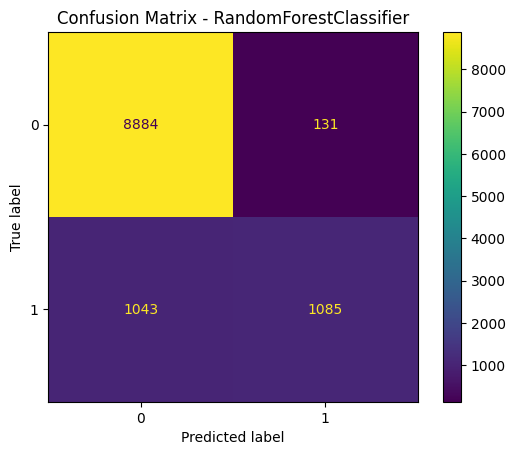

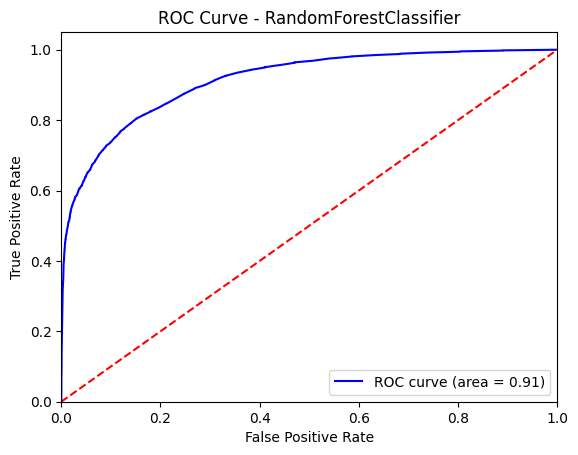

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:15:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier AUC: 0.8740480308508376
XGBClassifier Accuracy: 0.863053037781567
XGBClassifier Precision: 0.754222972972973
XGBClassifier Recall: 0.41964285714285715
XGBClassifier F1 Score: 0.5392512077294686
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      9015
           1       0.75      0.42      0.54      2128

    accuracy                           0.86     11143
   macro avg       0.82      0.69      0.73     11143
weighted avg       0.85      0.86      0.85     11143



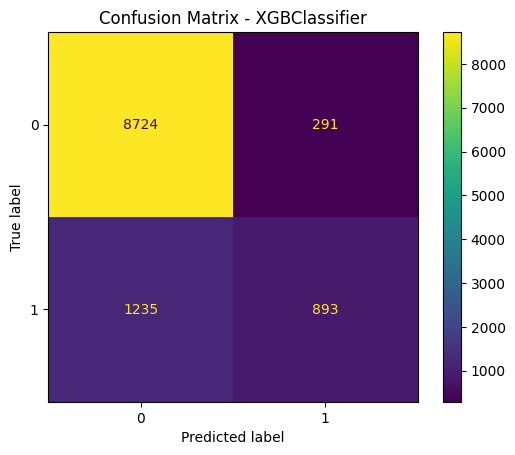

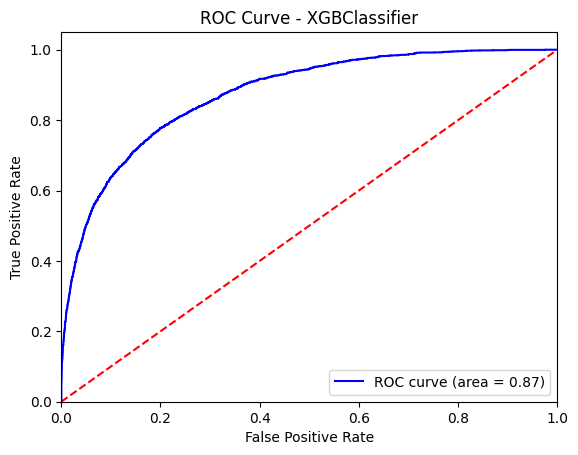

KNeighborsClassifier AUC: 0.8099882349384275
KNeighborsClassifier Accuracy: 0.8378354123665082
KNeighborsClassifier Precision: 0.6085192697768763
KNeighborsClassifier Recall: 0.42293233082706766
KNeighborsClassifier F1 Score: 0.4990296645411699
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      9015
           1       0.61      0.42      0.50      2128

    accuracy                           0.84     11143
   macro avg       0.74      0.68      0.70     11143
weighted avg       0.82      0.84      0.83     11143



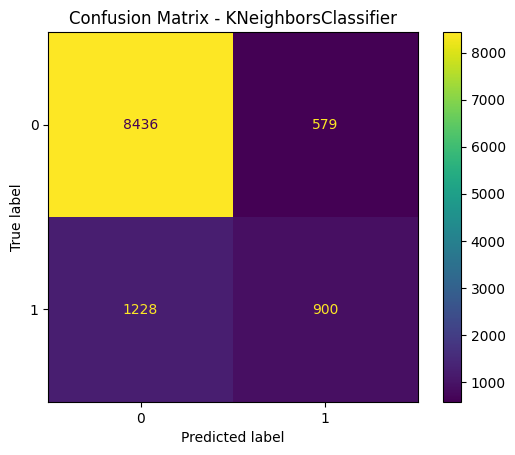

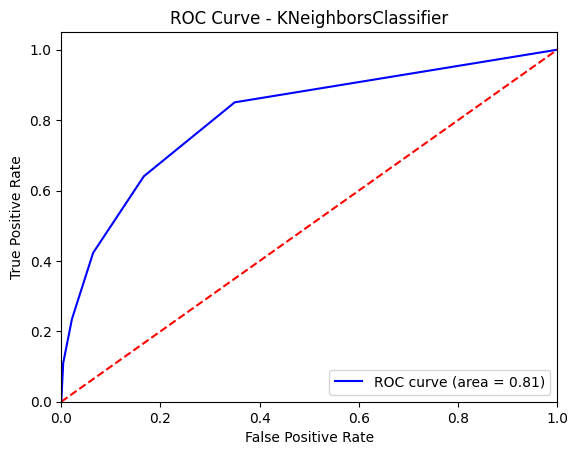

GaussianNB AUC: 0.5816769721725278
GaussianNB Accuracy: 0.28852194202638426
GaussianNB Precision: 0.20280795244927238
GaussianNB Recall: 0.9299812030075187
GaussianNB F1 Score: 0.3329968029614673
              precision    recall  f1-score   support

           0       0.89      0.14      0.24      9015
           1       0.20      0.93      0.33      2128

    accuracy                           0.29     11143
   macro avg       0.55      0.53      0.29     11143
weighted avg       0.76      0.29      0.26     11143



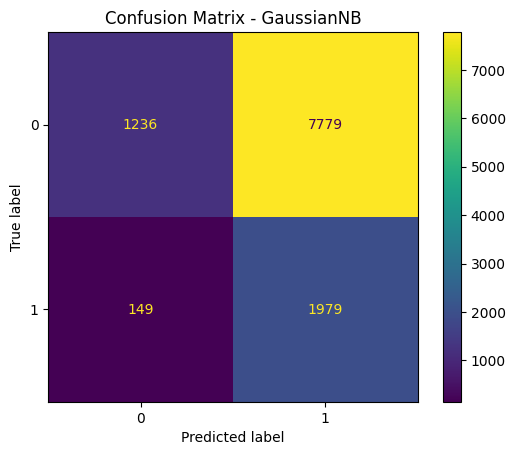

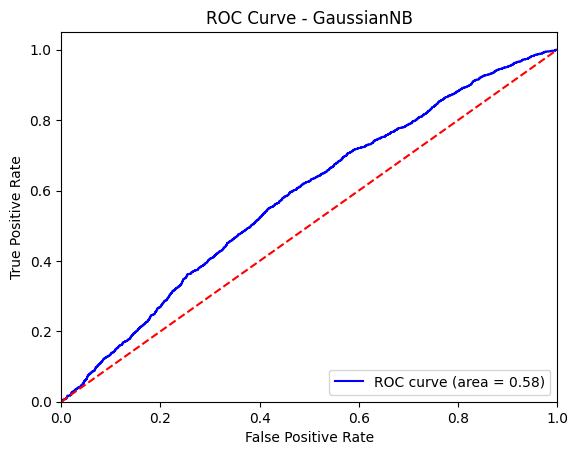

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_proba = model.predict_proba(X_test)[:, 1]

  auc_score = roc_auc_score(y_test, y_proba)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(f"{model.__class__.__name__} AUC: {auc_score}")
  print(f"{model.__class__.__name__} Accuracy: {accuracy}")
  print(f"{model.__class__.__name__} Precision: {precision}")
  print(f"{model.__class__.__name__} Recall: {recall}")
  print(f"{model.__class__.__name__} F1 Score: {f1}")
  print(classification_report(y_test, y_pred))

  # Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()
  plt.title(f'Confusion Matrix - {model.__class__.__name__}')
  plt.show()

  # ROC-AUC Curve
  fpr, tpr, thresholds = roc_curve(y_test, y_proba)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='red', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve - {model.__class__.__name__}')
  plt.legend(loc='lower right')
  plt.show()

# 1. Logistic Regression
log_reg = LogisticRegression(random_state=42)
evaluate_model(log_reg, X_train_scaled, y_train, X_test_scaled, y_test)

# 2. Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_classifier, X_train, y_train, X_test, y_test)

# 3. Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_classifier, X_train, y_train, X_test, y_test)

# 4. Gradient Boosting Classifier (XGBoost)
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
evaluate_model(xgb_classifier, X_train, y_train, X_test, y_test)

# 5. K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
evaluate_model(knn_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

# 6. Naive Bayes Classifier
nb_classifier = GaussianNB()
evaluate_model(nb_classifier, X_train, y_train, X_test, y_test)

**Key Insights**
1. Random Forest Classifier:

 The Random Forest Classifier demonstrated good performance, achieving the highest AUC score of 0.912 and an accuracy of 0.895. This model also exhibited a high precision of 0.892, indicating its effectiveness in correctly identifying non-target cases. However, the recall for positive cases is relatively low at 0.510, suggesting that while it excels at avoiding false positives, it misses a significant number of actual positive instances.

2. Logistic Regression:

  The performance is moderate with an AUC of 0.767, indicating it has some ability to discriminate between classes.
  The low recall (0.121) suggests it may be too conservative in predicting positive cases.

3. XGBoost:

  The XGBoost model produced a solid AUC of 0.874, indicating a robust ability to distinguish between classes. Despite this metric, the recall was limited at 0.420, raising concerns about its ability to capture sufficient positive cases.
  
4. Decision Tree Classifier:

  The Decision Tree Classifier provided balanced performance with an accuracy of 0.838 and a recall of 0.605. While these results indicate a reasonable capability in identifying positive cases, there is a risk of overfitting if the model is not adequately tuned, potentially leading to poor generalization on unseen data.

5. K-Nearest Neighbors (KNN):

  KNN demonstrated decent performance, but its results fell short compared to Random Forest and XGBoost. With an AUC of 0.810 and a recall of 0.423, it struggled to effectively identify positive instances, indicating it might not be the best choice for this classification task.

6. Gaussian Naive Bayes:

  The Gaussian Naive Bayes model performed poorly overall, achieving an accuracy of only 0.289 and a precision of 0.203. Despite exhibiting a high recall of 0.930, this performance suggests that it incorrectly predicts many negative cases as positive, leading to a high false positive rate. As a result, this model may not be suitable for reliable classification in this context.


### Hyperparameter Tuning

In [ ]:
from scipy.stats import randint

param_dist = {
  'n_estimators': randint(25, 151),
  'max_features': ['sqrt', 'log2', None],
  'max_depth': randint(3, 10),
  'max_leaf_nodes': randint(3, 10),
}

In [ ]:
random_search = RandomizedSearchCV(
  RandomForestClassifier(),
  param_distributions=param_dist,
  n_iter=50,
  cv=5,
  verbose=1,
  random_state=42,
  n_jobs=-1
)

random_search.fit(X_train, y_train)

print(random_search.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomForestClassifier(max_depth=5, max_features=None, max_leaf_nodes=9,
                       n_estimators=137)


In [ ]:
best_rf_model = random_search.best_estimator_

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
y_pred_best = best_rf_model.predict(X_test)

roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

print("Classification Report for Random Search Best Estimator:")
print(classification_report(y_test, y_pred_best))

print(f"AUC-ROC for Random Forest Classifier: {roc_auc_rf:.4f}")
print(f"AUC-ROC for Random Search Best Estimator: {roc_auc_best:.4f}")

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      9015
           1       0.89      0.51      0.65      2128

    accuracy                           0.89     11143
   macro avg       0.89      0.75      0.79     11143
weighted avg       0.89      0.89      0.88     11143

Classification Report for Random Search Best Estimator:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      9015
           1       0.00      0.00      0.00      2128

    accuracy                           0.81     11143
   macro avg       0.40      0.50      0.45     11143
weighted avg       0.65      0.81      0.72     11143

AUC-ROC for Random Forest Classifier: 0.7477
AUC-ROC for Random Search Best Estimator: 0.5000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The Random Forest Classifier(with default parameters) outperforms the Random Search Best Estimator (with hyperparameters tuning) across all metrics, particularly in detecting the minority class (1). The Random Search Best Estimator fails to predict any positive cases (class 1), resulting in poor precision, recall, and F1-score for that class.

### Cross-validation

In [ ]:
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.88490016 0.89084586 0.88433924 0.88680727 0.88769214]
Mean CV Score: 0.8869169327380544


### Validation with `'valid_data.csv'`



In [22]:
valid_data = pd.read_csv(os.path.join(directory,'valid_data.csv'))

valid_data = preprocess_data(valid_data)
valid_data = valid_data[top_features+ ['flag_zpexp', 'target']]

X_valid = valid_data.drop(columns=['target'])
y_valid = valid_data['target']

<ipython-input-13-d9728b7fec7c>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)


In [ ]:
y_pred_rf_val = rf_classifier.predict(X_valid)
y_pred_best = best_rf_model.predict(X_valid)

roc_auc_rf = roc_auc_score(y_valid, y_pred_rf_val)
roc_auc_best = roc_auc_score(y_valid, y_pred_best)

print("Classification Report for Random Forest Classifier for validation dataset:")
print(classification_report(y_valid, y_pred_rf))

print("Classification Report for Random Search Best Estimator for validation dataset:")
print(classification_report(y_valid, y_pred_best))

print(f"AUC-ROC for Random Forest Classifier for validation dataset: {roc_auc_rf:.4f}")
print(f"AUC-ROC for Random Search Best Estimator for validation dataset: {roc_auc_best:.4f}")

<ipython-input-115-88495d970f17>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)


Classification Report for Random Forest Classifier for validation dataset:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     12169
           1       0.63      0.18      0.28      1351

    accuracy                           0.91     13520
   macro avg       0.77      0.58      0.61     13520
weighted avg       0.89      0.91      0.88     13520

Classification Report for Random Search Best Estimator for validation dataset:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12169
           1       0.00      0.00      0.00      1351

    accuracy                           0.90     13520
   macro avg       0.45      0.50      0.47     13520
weighted avg       0.81      0.90      0.85     13520

AUC-ROC for Random Forest Classifier for validation dataset: 0.5834
AUC-ROC for Random Search Best Estimator for validation dataset: 0.5000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
conf_matrix = confusion_matrix(y_valid, y_pred_rf_val)
accuracy = accuracy_score(y_valid, y_pred_rf_val)
precision = precision_score(y_valid, y_pred_rf_val)
recall = recall_score(y_valid, y_pred_rf_val)
f1 = f1_score(y_valid, y_pred_rf_val)
auc_valid = roc_auc_score(y_valid, rf_classifier.predict_proba(X_valid)[:, 1])

print(f"Confusion Matrix:\n{conf_matrix}\n\nValidation Accuracy: {accuracy:.4f}, \nPrecision: {precision:.4f}, \nRecall: {recall:.4f}, \nF1-Score: {f1:.4f}, \nAUC: {auc_valid:.4f}")

Confusion Matrix:
[[12027   142]
 [ 1110   241]]

Validation Accuracy: 0.9074, 
Precision: 0.6292, 
Recall: 0.1784, 
F1-Score: 0.2780, 
AUC: 0.8303


### Balancing the dataset using *SMOTE* and/or *class weighting*

In [ ]:
from imblearn.over_sampling import SMOTE


--- Using Only SMOTE ---

Validation Dataset Evaluation:
Classification Report for Validation Dataset:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     12169
           1       0.32      0.41      0.36      1351

    accuracy                           0.86     13520
   macro avg       0.63      0.66      0.64     13520
weighted avg       0.87      0.86      0.86     13520

Confusion Matrix for Validation Dataset:
[[11012  1157]
 [  797   554]]
Precision: 0.3238
Recall: 0.4101
F1-Score: 0.3619
AUC-ROC: 0.8126


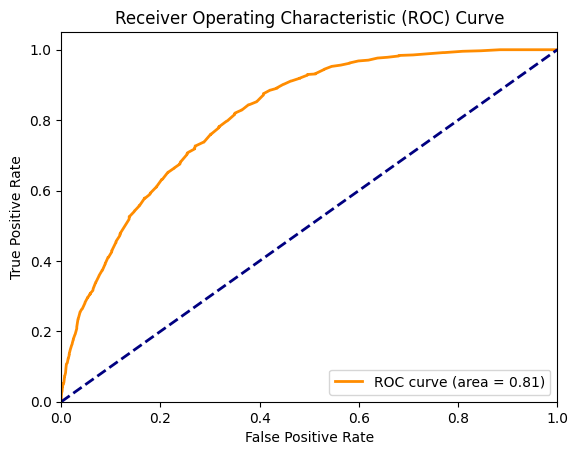


Test Dataset Evaluation:
Classification Report for Test Dataset:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      9015
           1       0.75      0.63      0.69      2128

    accuracy                           0.89     11143
   macro avg       0.84      0.79      0.81     11143
weighted avg       0.89      0.89      0.89     11143

Confusion Matrix for Test Dataset:
[[8576  439]
 [ 784 1344]]
Precision: 0.7538
Recall: 0.6316
F1-Score: 0.6873
AUC-ROC: 0.9111


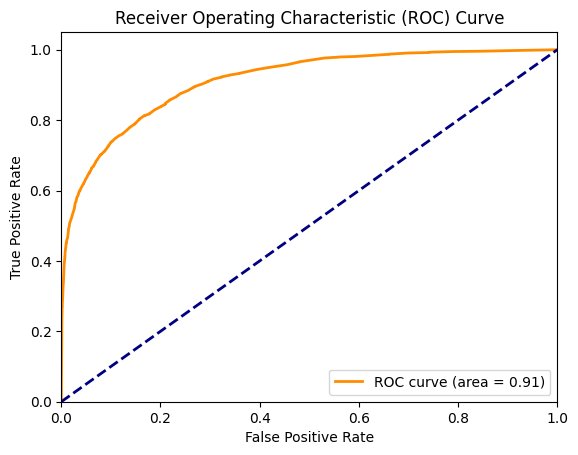


--- Using Weighted Model Only ---

Validation Dataset Evaluation:
Classification Report for Validation Dataset:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     12169
           1       0.64      0.15      0.24      1351

    accuracy                           0.91     13520
   macro avg       0.78      0.57      0.59     13520
weighted avg       0.89      0.91      0.88     13520

Confusion Matrix for Validation Dataset:
[[12060   109]
 [ 1153   198]]
Precision: 0.6450
Recall: 0.1466
F1-Score: 0.2388
AUC-ROC: 0.8367


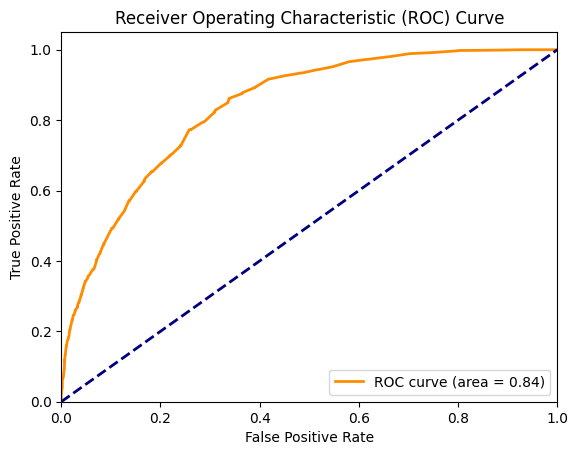


Test Dataset Evaluation:
Classification Report for Test Dataset:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      9015
           1       0.89      0.50      0.64      2128

    accuracy                           0.89     11143
   macro avg       0.89      0.74      0.79     11143
weighted avg       0.89      0.89      0.88     11143

Confusion Matrix for Test Dataset:
[[8885  130]
 [1067 1061]]
Precision: 0.8908
Recall: 0.4986
F1-Score: 0.6393
AUC-ROC: 0.9138


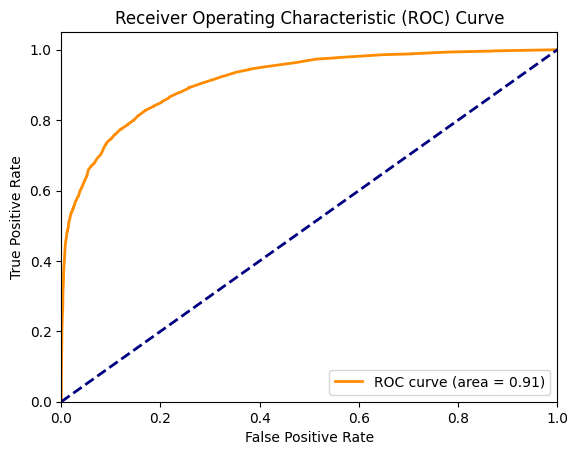


--- Using Both SMOTE and Weighted Model ---

Validation Dataset Evaluation:
Classification Report for Validation Dataset:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     12169
           1       0.32      0.41      0.36      1351

    accuracy                           0.86     13520
   macro avg       0.63      0.66      0.64     13520
weighted avg       0.87      0.86      0.86     13520

Confusion Matrix for Validation Dataset:
[[11012  1157]
 [  797   554]]
Precision: 0.3238
Recall: 0.4101
F1-Score: 0.3619
AUC-ROC: 0.8126


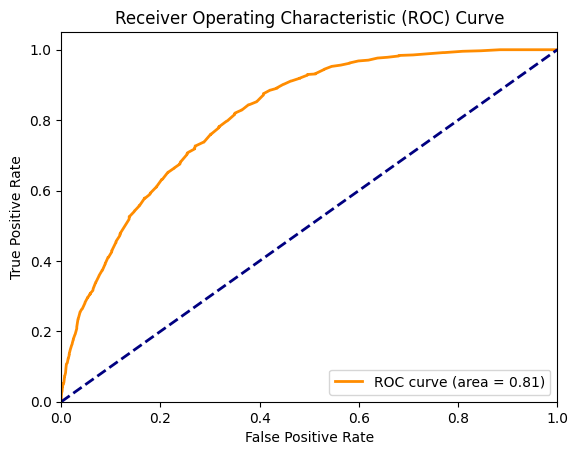


Test Dataset Evaluation:
Classification Report for Test Dataset:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      9015
           1       0.75      0.63      0.69      2128

    accuracy                           0.89     11143
   macro avg       0.84      0.79      0.81     11143
weighted avg       0.89      0.89      0.89     11143

Confusion Matrix for Test Dataset:
[[8576  439]
 [ 784 1344]]
Precision: 0.7538
Recall: 0.6316
F1-Score: 0.6873
AUC-ROC: 0.9111


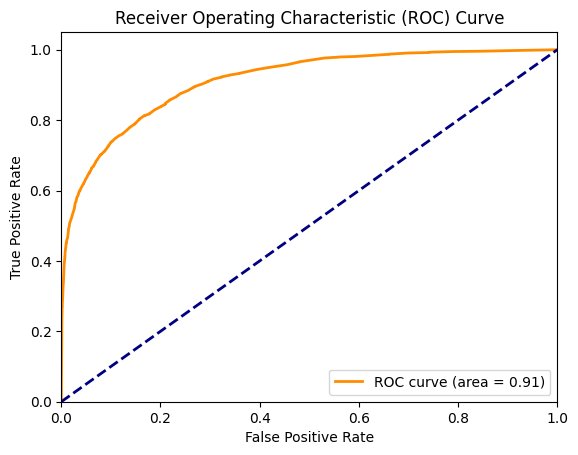

(0.7537857543466069, 0.631578947368421, 0.6872922526208131, 0.9111180613764027)

In [29]:
def balance_data_with_smote(X, y):
  smote = SMOTE(random_state=42)
  X_balanced, y_balanced = smote.fit_resample(X, y)
  return X_balanced, y_balanced

def train_rf_model(X_train, y_train, weighted=False):
  class_weight = 'balanced' if weighted else None
  model = RandomForestClassifier(n_estimators=100, class_weight=class_weight, random_state=42)
  model.fit(X_train, y_train)
  return model

def evaluate_model(model, X, y_true, dataset_name="Dataset"):
  y_pred = model.predict(X)
  y_prob = model.predict_proba(X)[:, 1]

  print(f"Classification Report for {dataset_name}:")
  print(classification_report(y_true, y_pred))

  print(f"Confusion Matrix for {dataset_name}:")
  print(confusion_matrix(y_true, y_pred))

  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  auc_roc = roc_auc_score(y_true, y_prob)

  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-Score: {f1:.4f}")
  print(f"AUC-ROC: {auc_roc:.4f}")

  y_pred_proba_balanced = model.predict_proba(X)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba_balanced)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.show()

  return precision, recall, f1, auc_roc

# Case 1: Using only SMOTE with no weighted model
print("\n--- Using Only SMOTE ---")
X_train_balanced, y_train_balanced = balance_data_with_smote(X_train, y_train)
smote_model = train_rf_model(X_train_balanced, y_train_balanced, weighted=False)

print("\nValidation Dataset Evaluation:")
evaluate_model(smote_model, X_valid, y_valid, dataset_name="Validation Dataset")

print("\nTest Dataset Evaluation:")
evaluate_model(smote_model, X_test, y_test, dataset_name="Test Dataset")

# Case 2: Using a weighted model with no SMOTE
print("\n--- Using Weighted Model Only ---")
weighted_model = train_rf_model(X_train, y_train, weighted=True)

print("\nValidation Dataset Evaluation:")
evaluate_model(weighted_model, X_valid, y_valid, dataset_name="Validation Dataset")

print("\nTest Dataset Evaluation:")
evaluate_model(weighted_model, X_test, y_test, dataset_name="Test Dataset")

# Case 3: Using both SMOTE and weighted model
print("\n--- Using Both SMOTE and Weighted Model ---")
X_train_balanced, y_train_balanced = balance_data_with_smote(X_train, y_train)
combined_model = train_rf_model(X_train_balanced, y_train_balanced, weighted=True)

print("\nValidation Dataset Evaluation:")
evaluate_model(combined_model, X_valid, y_valid, dataset_name="Validation Dataset")

print("\nTest Dataset Evaluation:")
evaluate_model(combined_model, X_test, y_test, dataset_name="Test Dataset")

## Summary

---

The Random Forest model displayed strong performance, particularly in predicting non-delinquent cases. However, challenges persisted in accurately classifying delinquent cases, primarily due to class imbalance in the dataset.

Upon validating the final model on a separate validation dataset, the Random Forest classifier achieved an AUC-ROC score of approximately 0.5834, indicating moderate discriminatory power.

However, after balancing the dataset the metrics improved markedly. Based on the results, using only SMOTE appears to be the most effective method for handling the class imbalance, especially on the test dataset. It achieved a higher F1-score of 0.69 and an AUC-ROC of 0.9111.
The accuracy of the model using only SMOTE, based on the evaluation results provided, is as follows:
- Validation Dataset Accuracy: 86%
- Test Dataset Accuracy: 89%

# Thank You!